In [1]:
import pandas as pd
import numpy as np

#### 분석 주제
한 회사의 HR 부서에서는 일부 고객이 향후 2년 내에 회사를 떠날지 여부를 예측하려고 합니다. 귀하의 임무는 미래와 현재 직원의 전망을 예측하는 예측 모델을 구축하는 것입니다. - 출처 : Kaggle 데이터세트 정보 

#### 컬럼별 설명
- Education : 직원들의 교육 수준
- Joining Year : 직원들의 입사 연도
- City : 회사 거점 지역
- PaymentTier : 연봉 등급 (결제 등급: 1: 최고 2: 중간 수준 3: 최저)
- Age : 직원들의 나이
- Gender : 직원 성별
- EverBenched : 1개월 이상 프로젝트를 중단한 적이 없음 No : 프로젝트 도중 중단 경험 있음 Yes : 프로젝트 도중 중단 경험 없음
- ExperienceInCurrentDomain : 현재 분야의 경험
- LeaveOrNot (Target) : 직원이 향후 2년 내에 회사를 떠날지 여부 1: 떠남 , 0: 안떠남

#### 📌 방향성 
> 독립변수들의 타겟 데이터에 대한 중요도 비중을 분석 한 다음에, 독립변수와의 상관관계성이 있거나 (즉 correlation을 활용한 히트맵에서 가중치가 0을 넘어서는 것) 분포가 좋지 못한 독립변수이면
>
> 삭제처리 대상으로 두고, 최고 성능을 가진 분류 모델 훈련 후 그 importance와 correaltion을 각각 비교하여 삭제 처리 하기로 하였습니다.


In [2]:
e_df = pd.read_csv('./datasets/Employee.csv')
e_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


#### 데이터 전처리
- 결측치 , 중복된행 검사 (있으면 제거)
- LabelEncoding
- histogram 시각화 후 비중 맞추기 (한 쪽으로 치우친 feature는 제거 (correaltion , importance 검증 후!))
- 표준화 작업
- 이상치 제거 (연속형 데이터가 나이 말고는 없기에 제거 할 필요성 X)

In [3]:
e_df['Education'].value_counts()
# Bachelors = 학사 과정 
# Masters = 석사 과정
# PHD = 박사 과정

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [4]:
e_df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
# e_df = e_df.drop_duplicates()
# e_df.duplicated().sum() # 중복 제거 

In [6]:
pre_df = e_df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 
columns = ['Education', 'City', 'Gender', 'EverBenched']

encoders = {}

# LabelEncoder()로 문자형 -> 정수형으로 변경 작업 
for column in columns :
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(pre_df[column].tolist())
    encoders[column] = encoder
    print(f'{column} : {encoder.classes_}')
   
pre_df    


Education : ['Bachelors' 'Masters' 'PHD']
City : ['Bangalore' 'New Delhi' 'Pune']
Gender : ['Female' 'Male']
EverBenched : ['No' 'Yes']


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


- Gender : (1:Male, 0 : Female)
- EverBenched : (1: Yes, 2: No) 💡Yes인 경우 프로젝트를 중단한 적이 없는 직원, No는 중단한 적이 있는 직원
- Education : (0: 학사 ,1 : 석사, 2: 박사)


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'EverBenched'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

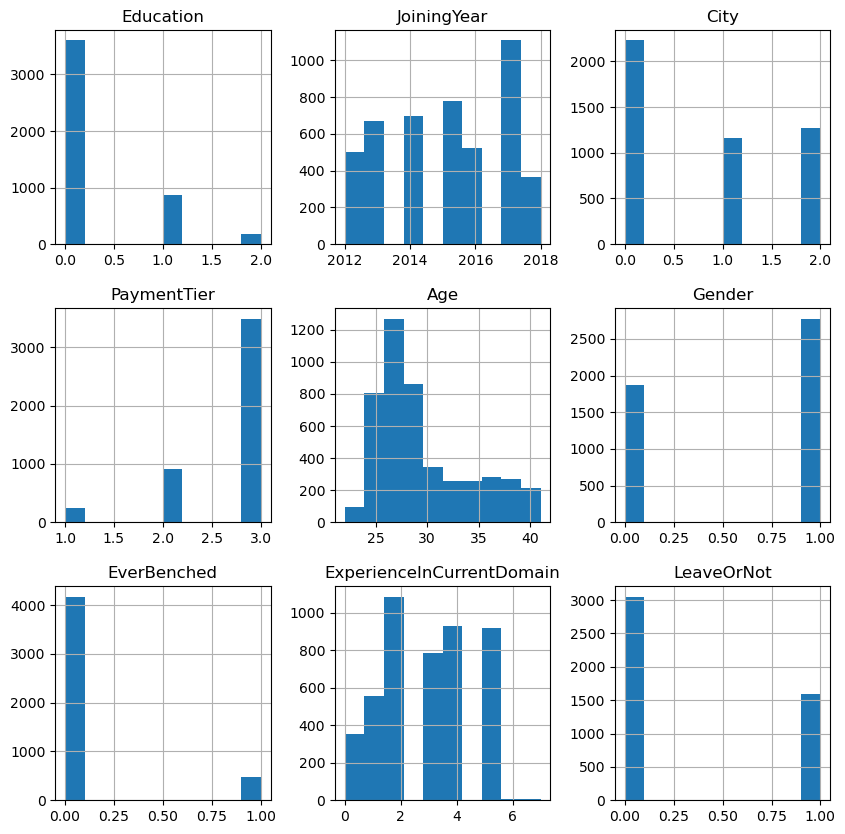

In [8]:
pre_df.hist(figsize=(10,10))

In [9]:
pre_df['ExperienceInCurrentDomain'].value_counts()
# 비슷한 직종 경험 횟수 

ExperienceInCurrentDomain
2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: count, dtype: int64

#### 💡 Target 데이터와의 가중치 비중 확인 전 제거 우선순위 Features 
> 1. Eucation(학력)
> 2. EverBenched (프로젝트 중단 유무)
> 3. Payment Tier
> 4. ExperienceInCurrentDomain (비슷한 직종 경험 횟수)
#### 우선 correlation 으로 타겟 데이터와의 가중치 비중 확인 뒤에 판단

In [10]:
pre_df['City'].value_counts()

City
0    2228
2    1268
1    1157
Name: count, dtype: int64

In [11]:
# 타겟에 대한 피처들의 비중 분석
corr = pre_df.corr()
corr[['LeaveOrNot']].sort_values(by='LeaveOrNot', ascending=False)[1:]
# Gender , Joining Year 순으로 높다. 

,LeaveOrNot
City,0.201058
JoiningYear,0.181705
Education,0.080497
EverBenched,0.078438
ExperienceInCurrentDomain,-0.030504
Age,-0.051126
PaymentTier,-0.197638
Gender,-0.220701


#### ✨ 비중 순위 
> 1. City
> 2. JoingYear
> 3. Gender
> 4. PaymentTier
>
> #### 위에서 추출한 상위 4개의 Feature가 Target 데이터에 영향을 미칠 것으로 판단 됩니다.
>
> #### 나머지 분포가 고르지 못한 Feature들은 마지막에 최고성능분류기의 importance와 correlation 비교 뒤 삭제 처리

Text(0.5, 1.0, 'Leave Distribution')

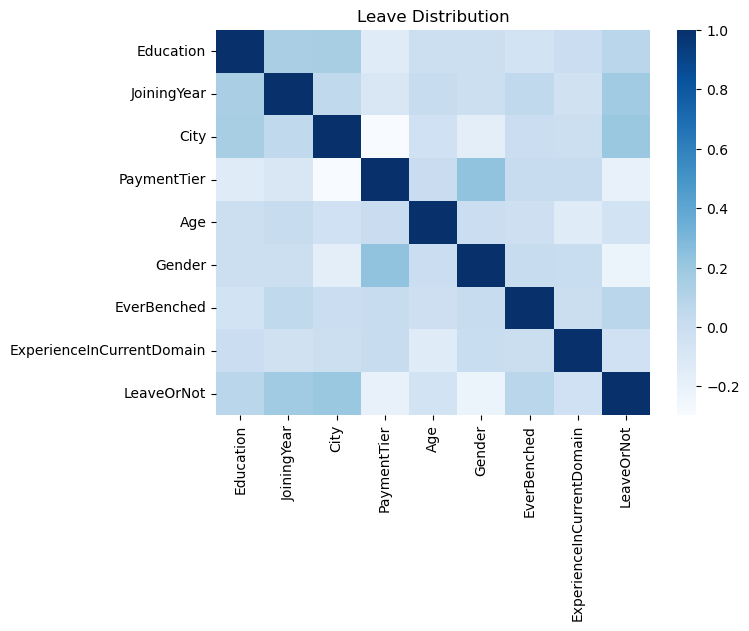

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pre_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Blues")
heatmap.set_title("Leave Distribution")

#### 💡위 히트맵을 통해 독립변수들과의 상관관계를 분석한 결과
> **Education 과 City,JoingYear 와의 상관관계가 0.2~0.4 정도의 비중을 보이기에 Education은 삭제해도 무방하다고 판단**
> 
> **Gender와 PaymentTier 같은 경우에도 위 Education보다 더 진한 상관관계임을 볼 수 있습니다.**
> 
> **Gender가 Target데이터와의 비중이 PaymentTier보다 높기 때문에 삭제의 근거가 될 수 있습니다.**

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'EverBenched'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

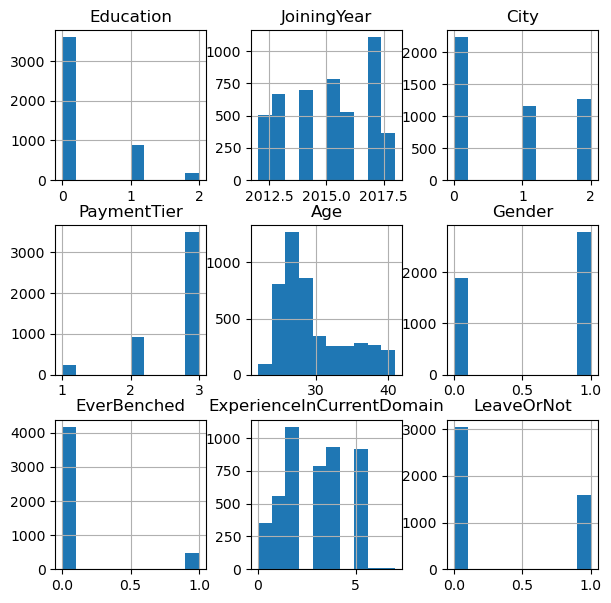

In [13]:
pre_df.hist(figsize=(7,7))

In [14]:
pre_df['City'].value_counts()

City
0    2228
2    1268
1    1157
Name: count, dtype: int64

#### 📊 City의 경우 데이터의 분포가 고르지 않기 때문에 1 값에 맞춰서 언더 샘플링을 시행!

In [15]:
# 언더 샘플링 시행
City1 = pre_df[pre_df.City == 1]
City2 = pre_df[pre_df.City == 0].sample(1157, random_state=124)
City3 = pre_df[pre_df.City == 2].sample(1157, random_state=124)

pre_df = pd.concat([City1, City2, City3]).reset_index(drop=True)

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'EverBenched'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

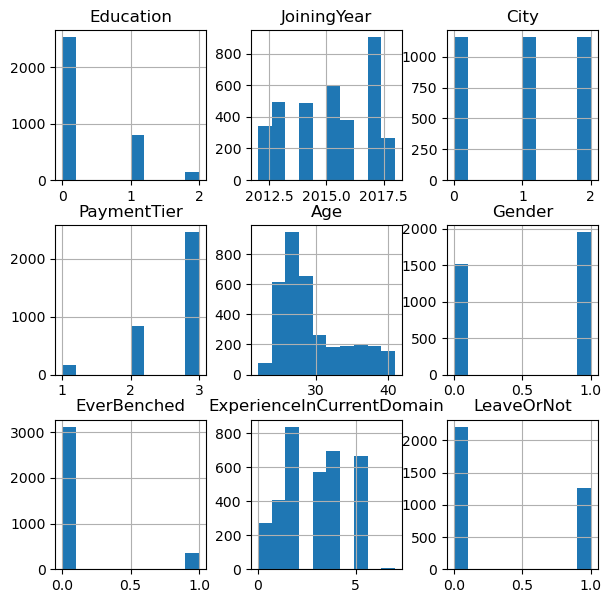

In [16]:
pre_df.hist(figsize=(7,7))

#### Fit(훈련) 한 뒤에 제거 판단! (훈련 전 제거는 좋지 않다고 판단하였습니다.)

In [17]:
# 히스토그램에서 비중이 한 쪽으로 치우친 Feature들과 비중이 작은 Feature들은 삭제
# ex) Education , EverBenched 삭제 
# pre_df = pre_df.drop(labels=['Education', 'EverBenched', 'ExperienceInCurrentDomain'], axis=1)
# pre_df

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'EverBenched'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

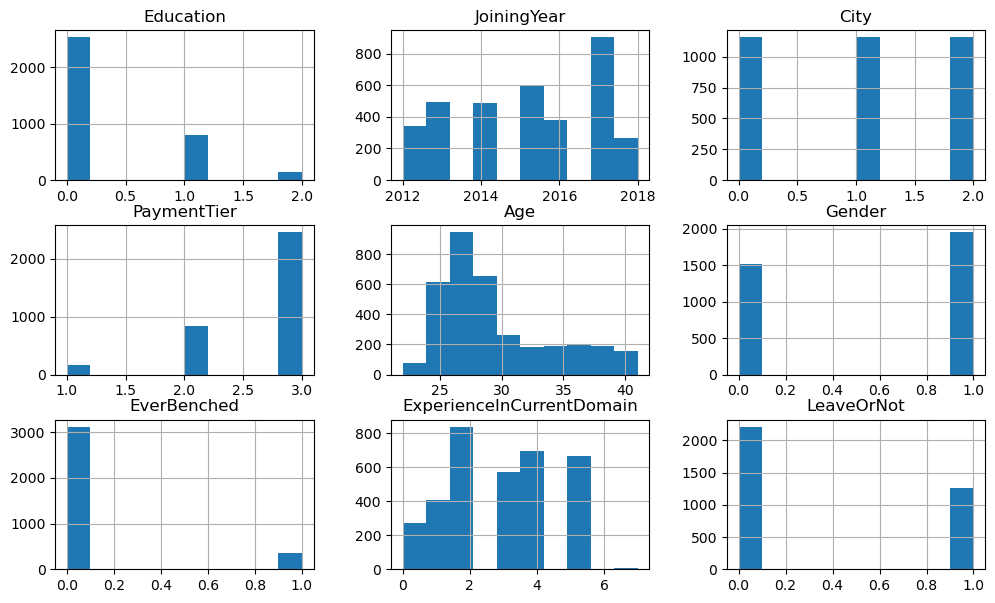

In [18]:
pre_df.hist(figsize=(12,7))

#### 💡PaymentTier는 삭제하지 않은 이유 ?
> **연봉등급을 나타내는 PaymentTier는 도메인지식을 활용해서 분석해보았을 때, 연봉과 퇴사율과 연관성이 있는 것으로 판단이 되므로, 데이터 분석 시각화를 진행하기 위해 일단 삭제하지 않기로 하였습니다.**
>
> 데이터 분석을 진행하고, 크게 연관성이 있어보이지 않거나, 최종 훈련시에 importance와 비교하여 삭제 처리!

In [19]:
a_df = e_df.copy()

In [20]:
import seaborn as sns
import numpy as np


a_df['PaymentTier'] = a_df['PaymentTier'].astype(str)
a_df['LeaveOrNot'] = a_df['LeaveOrNot'].astype(str)


Text(0.5, 0, 'City')

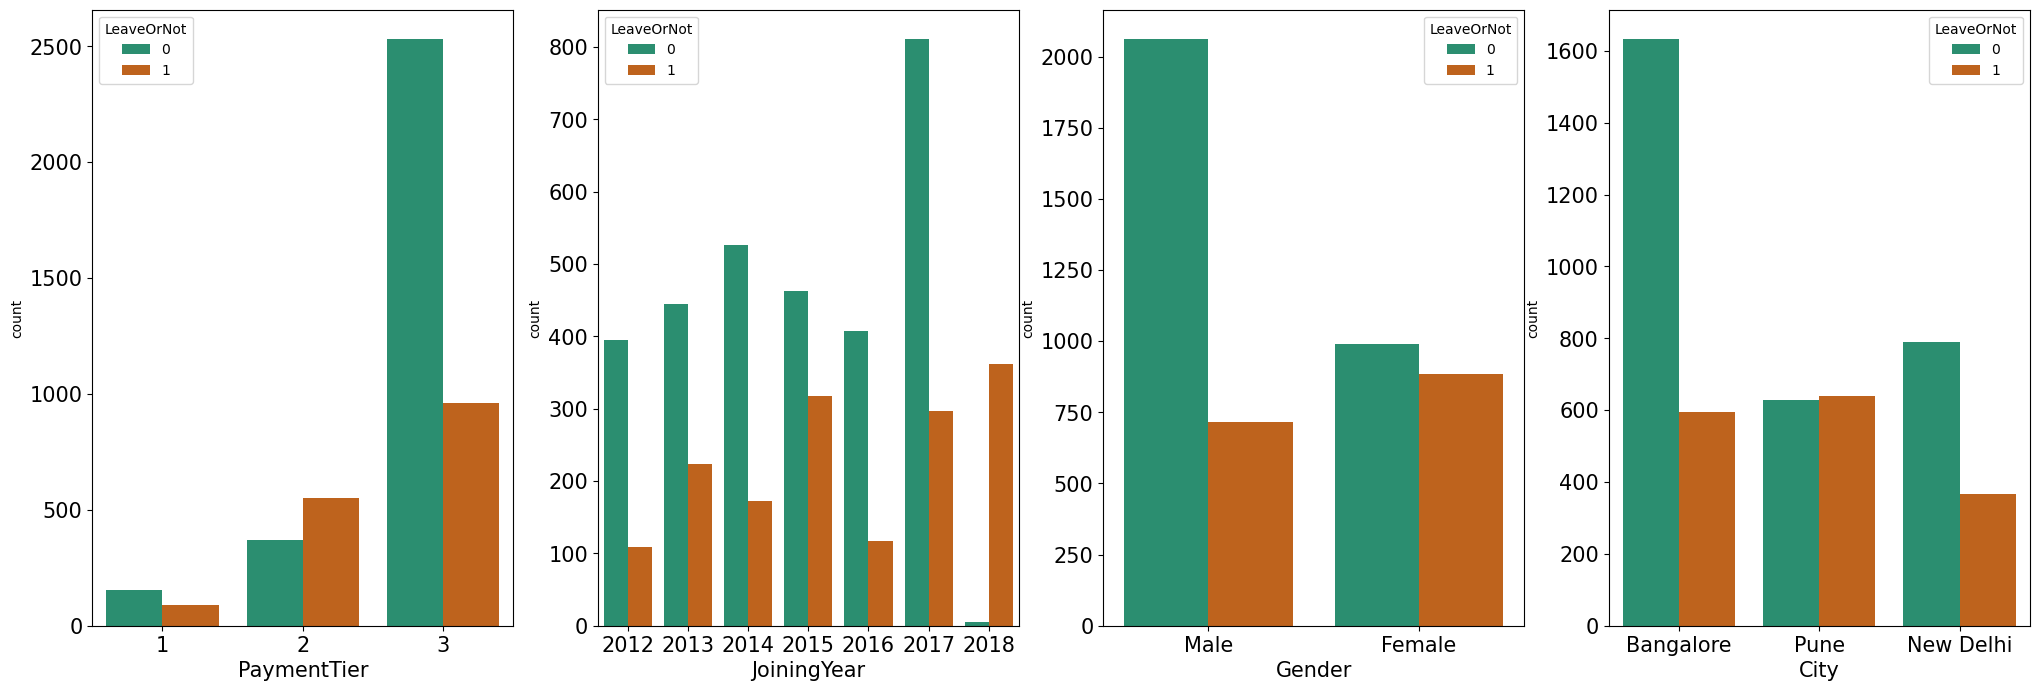

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 8))

order_pay = ['1','2','3']

sns.countplot(x='PaymentTier', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[0], order=order_pay)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=15)

sns.countplot(x='JoiningYear', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[1])
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=15)

sns.countplot(x='Gender', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[2])
axes[2].tick_params(axis='both', which='major', labelsize=15)
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=15)

sns.countplot(x='City', hue='LeaveOrNot', palette="Dark2", data=a_df, ax=axes[3])
axes[3].tick_params(axis='both', which='major', labelsize=15)
axes[3].set_xticklabels(axes[3].get_xticklabels(), fontsize=15)

axes[0].set_xlabel('PaymentTier', fontsize=15)
axes[1].set_xlabel('JoiningYear', fontsize=15)
axes[2].set_xlabel('Gender', fontsize=15)
axes[3].set_xlabel('City', fontsize=15)





#### ✨ 타겟데이터 와의 상관관계 & 독립변수 상관관계 분석 후 불필요한 Feature들은 제거하기로 하였습니다.

> ##### **PaymentTier 등급 (1~3) : 1로 갈수록 연봉이 높음을 의미합니다.**
>
> #### **Payment 제거 이유**
> 
> 📌 앞서 언급한 PaymenmtTier(연봉등급)의 경우  타겟데이터와의 비중도 적고,
> 
> 3 등급에 매우 많이 분포되어있었습니다. 또한 가장 연봉이 적을 수록 퇴사율이 높은 것으로 판단하였지만,
> 
> 오히려 중간 등급인 2 레벨에서 퇴사율이 더 높은 것으로 보아 확실한 Target 데이터와의 연관성이 불투명해보였으므로 제거를 하기로 판단하였습니다.
>
> 추가적으로 Gender와의 상관관계가 있음을 보았는데, Gender가 Target 데이터와의 비중이 더 크므로 제거 처리의 이유가 될 수 있습니다.

#### ✨ 데이터 분석 시각화 내용
- 여성의 퇴사율이 남성에 비해 더 높은 수치를 보이며, 이는 여성직원들의 불만도가 더 높은 것으로 판단됩니다.
- pune (인도 내 도시)이라는 회사 지사에서 전체 분포 대비 퇴사율이 높은 것을 알 수 있으며 이는 곧 pune 지사내 직원들의 회사에 대한 불만도가 높은 것으로 판단됩니다. 

In [22]:
# Payment Tier -> 타겟데이터와의 비중도 적고, 3 등급에 매우 많이 분포되어있어, 분포도 일정치 않기에 제거
# pre_df = pre_df.drop(labels=['PaymentTier'], axis=1)
pre_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2014,1,3,38,0,0,2,0
1,0,2015,1,3,38,1,0,0,0
2,1,2017,1,2,37,1,0,2,0
3,0,2016,1,2,22,0,0,0,1
4,1,2017,1,2,28,1,0,4,0
...,...,...,...,...,...,...,...,...,...
3466,0,2012,2,3,28,1,0,2,0
3467,0,2015,2,2,39,0,0,5,1
3468,0,2012,2,2,26,0,0,4,1
3469,0,2017,2,2,37,0,0,4,1


Text(0.5, 1.0, 'Leave Distribution')

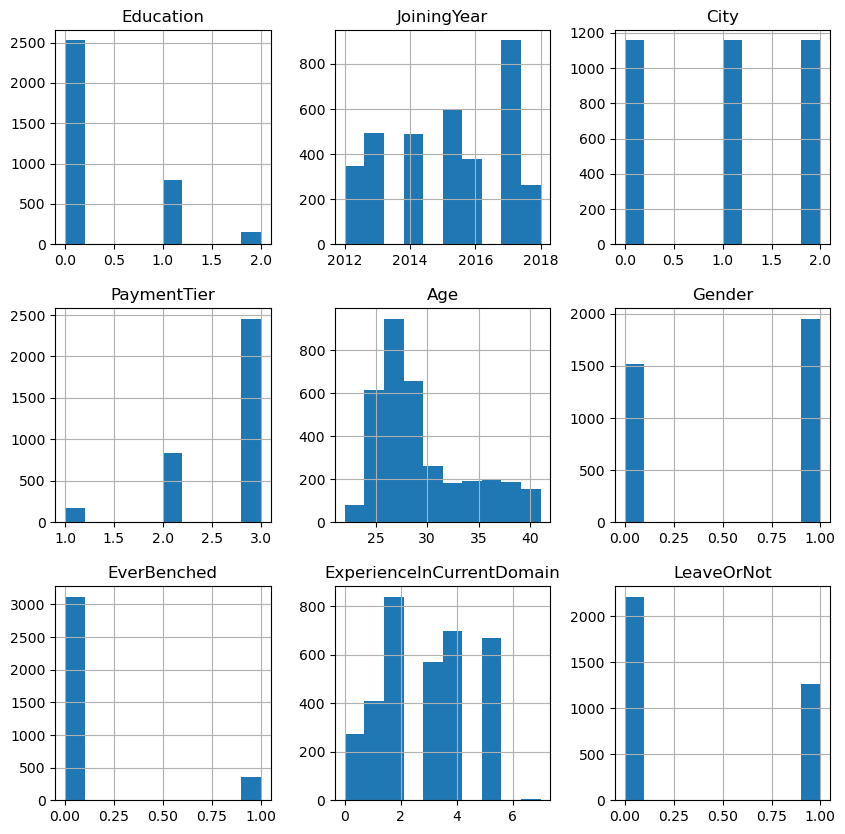

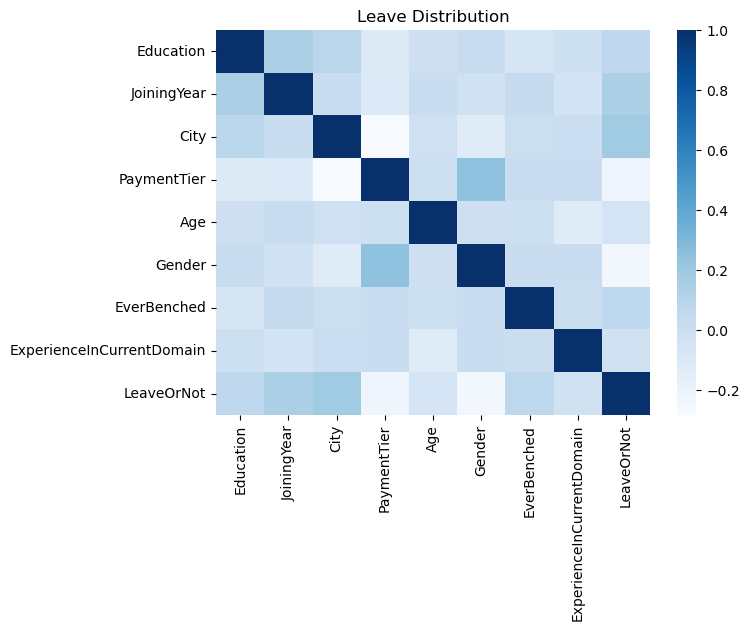

In [23]:
pre_df.hist(figsize=(10,10))
import seaborn as sns
import matplotlib.pyplot as plt

corr = pre_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Blues")
heatmap.set_title("Leave Distribution")

# 마지막 최고성능분류기 permutation importance와 비교해야 합니다. (ImpCycle)

## 📌 데이터 전처리 완료

### 💡시각화 분석
#### 📌 Feature 소개
- PaymentTier(연봉등급) **1: 고소득, 2: 중위소득, 3: 하위소득**
- Joining Year (입사연도) **2012 ~ 2018**
- Gender (성별)
- City (회사 지점)
- LeaveOrNot(퇴사 여부) **1: 퇴사(Positive) , 2:퇴사 안함(Negative)**

#### 📊 시각화 분석 내용
> 연봉등급별로 퇴사 여부를 분석결과 가장 저소득 연봉을 받는 직원들의 퇴사율이 가장 높았으며, 입사연도 같은 경우 2017년도에 입사한 직원들이 가장 많았지만, 퇴사율이 가장 높은 입사연도 직원들은 2018년도 인 것으로보아 비교적 신규 직원들의 퇴사율이 매우 높은 것을 알 수 있었습니다. 그러나 연봉등급 피처의 경우에는 하위소득층에만 매우 높게 분포되었기 때문에, 상관관계 분석 후 이 피처는 제거 하기로 하였습니다.
> 
> 성별 분포별로 퇴사율 분석결과 여성직원의 경우 전체 분포 대비 퇴사율이 높은 것을 알 수 있었습니다.
> 
> Pune이라는 지역이 (인도 내 회사로 추정) 전체 직원 수 대비 퇴사율이 매우 높은 것을 알 수 있었습니다.

😊 해당 데이터세트에서는 모든 Feature에 연속형 데이터가 없기 때문에 이상치 제거를 할 필요가 없습니다.

#### 테스트, 학습 세트 분리 & SMOTE(OverSampling) 실시

#### 📃 SMOTE를 사용하여 오버샘플링을 하기로 결정하였습니다.  퇴사를 결정하는 1의 타겟 데이터가 낮은 데이터 비중을 차지하기에 
#### 이 퇴사를 뜻하는 Positive 데이터 비중을 높혀야 합니다.

In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)
y_train.value_counts()
# SMOTE를 사용하여 오버샘플링을 하자! 퇴사를 결정하는 1의 타겟 데이터가 낮은 데이터 비중을 차지하기에 
# 이 비중을 높혀야 합니다.

LeaveOrNot
0    1770
1    1006
Name: count, dtype: int64

In [25]:
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
y_train_over.value_counts()
# 정상적으로 오버샘플링 되었습니다.

LeaveOrNot
1    1770
0    1770
Name: count, dtype: int64

#### ✨ 1 Cycle
#### 📌 Classifier (분류 작업) 실시 , Feature 별 중요도 확인 
- 교차검증 (GridSearchCV)
- DTC (Decisiton Tree Classifier)
- SVC (Support Vactor Machine {kernel : linear})
- KNN (최근접 이웃 알고리즘)
----
- Ensemble (Bagging, Boosting)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# DTC 파라미터 선언
dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split' :[12,13,14] }
dtc = DecisionTreeClassifier()
# 교차 검증 수행
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)



In [27]:
# SVC 파라미터 선언 (커널을 linear로 설정)
svc_parameters = {'svc__C': [0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear']
                 }

# SVC 클래스 설정 (커널을 linear로 설정)
svc = SVC(kernel='linear', probability=True)

# SVC 파이프라인 구축, 교차 검증 수행
svc_pipe = Pipeline([('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_svc.fit(X_train_over, y_train_over)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('svc',
                                        SVC(kernel='linear',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear']},
             return_train_score=True)

In [28]:
svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(svc_result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__kernel': 'linear'}",0.640678,5
1,"{'svc__C': 0.1, 'svc__kernel': 'linear'}",0.649435,1
2,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.649435,1
3,"{'svc__C': 10, 'svc__kernel': 'linear'}",0.649435,1
4,"{'svc__C': 100, 'svc__kernel': 'linear'}",0.649435,1


In [29]:
# KNN 파라미터 선언 
knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,15,17]}

# KNN 클래스 설정
knn = KNeighborsClassifier()

# KNN 파이프라인 구축, 교차 검증 수행 
knn_pipe = Pipeline([('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [30]:
g_dtc.fit(X_train_over, y_train_over)
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)
g_dtc

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 12}",0.801130,7
1,"{'max_depth': 5, 'min_samples_split': 13}",0.801130,7
2,"{'max_depth': 5, 'min_samples_split': 14}",0.801130,7
3,"{'max_depth': 6, 'min_samples_split': 12}",0.817232,4
4,"{'max_depth': 6, 'min_samples_split': 13}",0.817232,4
5,"{'max_depth': 6, 'min_samples_split': 14}",0.817232,4
6,"{'max_depth': 7, 'min_samples_split': 12}",0.825141,1
7,"{'max_depth': 7, 'min_samples_split': 13}",0.825141,1
8,"{'max_depth': 7, 'min_samples_split': 14}",0.825141,1


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [12, 13, 14]},
             return_train_score=True)

In [31]:
g_knn.fit(X_train_over, y_train_over)
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(knn_result_df)


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},0.800565,1
1,{'knn__n_neighbors': 5},0.791525,3
2,{'knn__n_neighbors': 7},0.794633,2
3,{'knn__n_neighbors': 9},0.789266,4
4,{'knn__n_neighbors': 11},0.786158,5
5,{'knn__n_neighbors': 15},0.776554,7
6,{'knn__n_neighbors': 17},0.779379,6


In [32]:
from sklearn.inspection import permutation_importance
# DTC importance
importance = permutation_importance(g_dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([1, 0, 5, 3, 2, 4, 7, 6], dtype=int64)

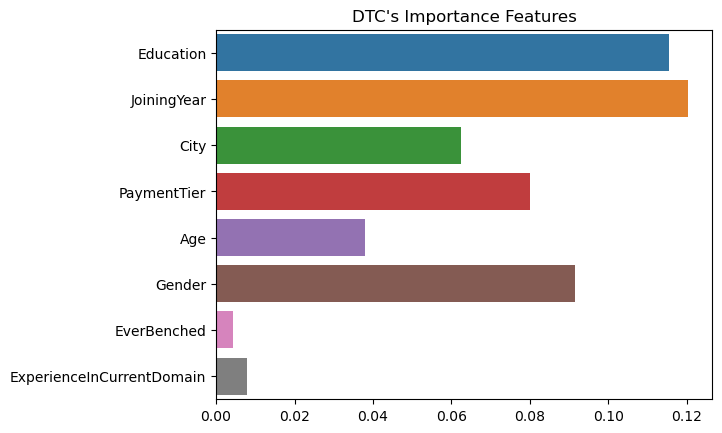

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.title("DTC's Importance Features")
plt.show()

#### DTC 분류 결과 permutation Importance
<img src='./images/corr.png'><img src='./images/hit.png' width='400px'><img src='./images/dtc_imp.png' width='700px'>  

> 훈련 전 기존 데이터에서는 correlation에서 City가 가장 비중이 높았지만, DTC분류 모델로 중요도를 산출한 결과
>
> JoiningYear가 가장 중요도가 높았으며, 그 다음으로 학력사항인 것을 확인
>
> 이전에 제거 우선 순위로 두었던 연봉등급이 꽤 높은 중요도를 차지 하는것을 확인
>
> **DTC 모델이 성능이 가장 좋다면, PaymentTier(연봉등급) Feature는 절대 삭제하면 안된다.**
>
> image1

In [34]:
from sklearn.inspection import permutation_importance
# SVC importance
importance = permutation_importance(g_svc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([5, 7, 6, 4, 3, 2, 1, 0], dtype=int64)

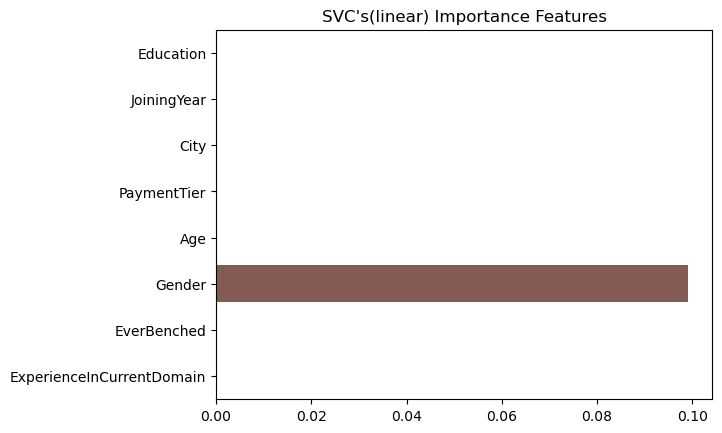

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.title("SVC's(linear) Importance Features")
plt.show()

#### 선형데이터 (linear)로 커널을 설정한 SVC 분류 모델의 경우 정상적이지 않은 Feature 중요도를 보였습니다.
> #### 성능이 낮을 것으로 추측됩니다.

In [36]:
from sklearn.inspection import permutation_importance
# KNN importance
importance = permutation_importance(g_knn, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([1, 0, 5, 3, 2, 4, 7, 6], dtype=int64)

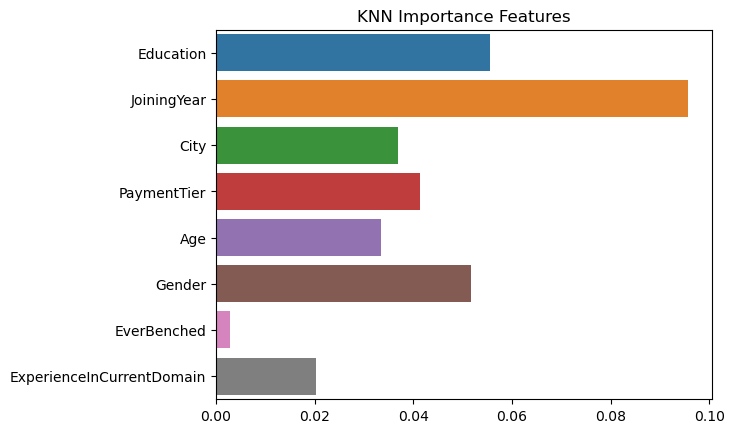

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.title("KNN Importance Features")
plt.show()

#### 📃 KNN 분류기법의 경우 위 DTC와 유사한 Feature별 중요도를 보입니다. 여기서도 마찬가지로 PaymentTier는 삭제 하지 않기로 판단하였습니다.

### ✨ 2 Cycle 📌 Classifier ( 앙상블 학습 분류 작업) 
> Ensemble 분류기법
>
> bagging(RFC)
> 
> AdaBoost
> 
> Gradient Boost
> 
> XGBoost
> 
> LightGradientBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
# bagging (Random Forest 분류 기법 사용)

rfc_parameters = {
    'max_depth' : [20,21,22],
    'min_samples_split' : [15,16,17]
}

rfc = RandomForestClassifier(n_estimators=100)

g_rfc = GridSearchCV(rfc, param_grid=rfc_parameters, cv=5, n_jobs=-1)
g_rfc.fit(X_train_over, y_train_over)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22],
                         'min_samples_split': [15, 16, 17]})

In [39]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(rfc_result_df)


,params,mean_test_score,rank_test_score
0,"{'max_depth': 20, 'min_samples_split': 15}",0.851695,1
1,"{'max_depth': 20, 'min_samples_split': 16}",0.850282,5
2,"{'max_depth': 20, 'min_samples_split': 17}",0.847740,9
3,"{'max_depth': 21, 'min_samples_split': 15}",0.851130,2
4,"{'max_depth': 21, 'min_samples_split': 16}",0.850000,6
5,"{'max_depth': 21, 'min_samples_split': 17}",0.848588,8
6,"{'max_depth': 22, 'min_samples_split': 15}",0.850000,6
7,"{'max_depth': 22, 'min_samples_split': 16}",0.850847,3
8,"{'max_depth': 22, 'min_samples_split': 17}",0.850565,4


In [40]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier

# AdaBoost 분류 기법 사용 

paramters = {
    'n_estimators' : [50, 100, 300],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=paramters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)



GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 300]})

In [41]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(ada_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.780508,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.779944,2
2,"{'learning_rate': 0.3, 'n_estimators': 300}",0.778814,3
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.778814,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.776836,8
5,"{'learning_rate': 0.5, 'n_estimators': 300}",0.778249,6
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.775424,12
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.778531,5
8,"{'learning_rate': 0.7, 'n_estimators': 300}",0.775706,11
9,"{'learning_rate': 1, 'n_estimators': 50}",0.776554,9


#### **AdaBoost (learning_rate : 0.5 , n_estimators가 50일때 최고 성능을 보여줌)**

In [42]:
# Gradient Boost 분류 기법 사용 
gbc_parameters = {
    'n_estimators': [50, 100, 300,500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbc_parameters, cv=3)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 300, 500]})

In [43]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(gbc_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.835028,9
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.839831,5
2,"{'learning_rate': 0.3, 'n_estimators': 300}",0.843785,1
3,"{'learning_rate': 0.3, 'n_estimators': 500}",0.837006,8
4,"{'learning_rate': 0.5, 'n_estimators': 50}",0.837288,6
5,"{'learning_rate': 0.5, 'n_estimators': 100}",0.841808,2
6,"{'learning_rate': 0.5, 'n_estimators': 300}",0.833333,11
7,"{'learning_rate': 0.5, 'n_estimators': 500}",0.827119,14
8,"{'learning_rate': 0.7, 'n_estimators': 50}",0.833898,10
9,"{'learning_rate': 0.7, 'n_estimators': 100}",0.840960,3


#### **GBM learning_rate : 0.5, n_estimators가 500일때 최고 성능을 보여줌**

In [44]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

x_parameters = {'n_estimators' : [50, 100, 500],
               'learning_rate' : [0.3, 0.5, 0.7, 1]}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=x_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# smote = SMOTE(random_state=124)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_xgb.fit(X_train_over, y_train_over, early_stopping_rounds=50, eval_set=evals)


[0]	validation_0-logloss:0.56218	validation_1-logloss:0.56493
[1]	validation_0-logloss:0.49028	validation_1-logloss:0.49350
[2]	validation_0-logloss:0.44154	validation_1-logloss:0.44649
[3]	validation_0-logloss:0.41058	validation_1-logloss:0.41724
[4]	validation_0-logloss:0.38831	validation_1-logloss:0.39695
[5]	validation_0-logloss:0.36915	validation_1-logloss:0.37710
[6]	validation_0-logloss:0.35634	validation_1-logloss:0.36292
[7]	validation_0-logloss:0.34442	validation_1-logloss:0.35219
[8]	validation_0-logloss:0.33664	validation_1-logloss:0.34415
[9]	validation_0-logloss:0.33029	validation_1-logloss:0.33783
[10]	validation_0-logloss:0.32493	validation_1-logloss:0.33105
[11]	validation_0-logloss:0.32137	validation_1-logloss:0.32671
[12]	validation_0-logloss:0.31723	validation_1-logloss:0.32271
[13]	validation_0-logloss:0.31381	validation_1-logloss:0.31875
[14]	validation_0-logloss:0.30982	validation_1-logloss:0.31498
[15]	validation_0-logloss:0.30798	validation_1-logloss:0.31265
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [45]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

lg_parameters = {'n_estimators' : [50, 100, 500],
                'learning_rate' : [0.3, 0.5, 0.7, 1]}
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# smote = SMOTE(random_state=124)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train),(X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lg_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Number of positive: 1770, number of negative: 1770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 3540, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [46]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(lgbm_result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.845763,1
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.843503,2
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.831638,11
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.839548,4
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.836723,5
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.834181,9
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.840113,3
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.834746,8
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.828531,12
9,"{'learning_rate': 1, 'n_estimators': 50}",0.835028,7


#### **LGBM : learning_Rate 가 0.5, n_estimators가 50일때 최고 성능을 보여줌**

In [47]:
from sklearn.inspection import permutation_importance
# RFC importance
importance = permutation_importance(g_rfc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([0, 1, 5, 3, 2, 4, 7, 6], dtype=int64)

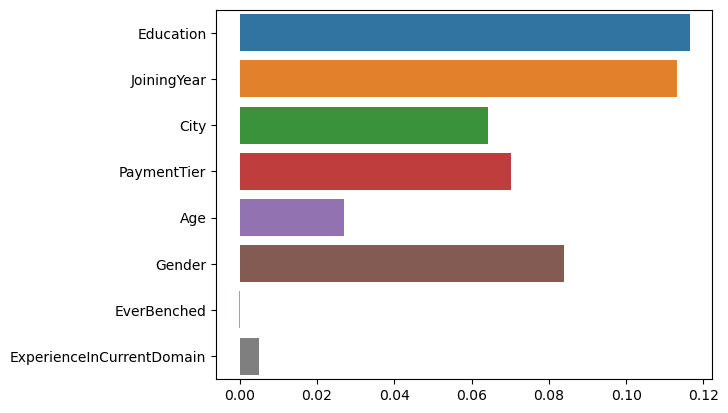

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.show()

#### Bagging 분류 결과 permutation Importance
<img src='./images/corr.png'><img src='./images/hit.png' width='400px'>

> 이번 RandomForest 알고리즘을 사용한 bagging 분류기의 경우 기존 가장 중요도가 높았던 City의 비중이 의외로 낮은 것을 확인 하였고, Education의 비중이 상위 2등으로 매우 높은 것을 확인 할 수 있었습니다.
>
> bagging(rfc)가 가장 성능이 높다면, Education feature 같은 경우 삭제 처리를 하는 것이 아니라, 언더샘플링을 통해 비중을 맞춰야 합니다. PaymentTier도 마찬가지입니다.
> 
> image1

#### 📌 GraphViz로 결정트리 확인 

In [49]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(g_dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([1, 0, 5, 3, 2, 4, 7, 6], dtype=int64)

In [50]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

JoiningYear: 0.1204
Education: 0.1156
Gender: 0.0914
PaymentTier: 0.08
City: 0.0624
Age: 0.0381
ExperienceInCurrentDomain: 0.0079
EverBenched: 0.0042


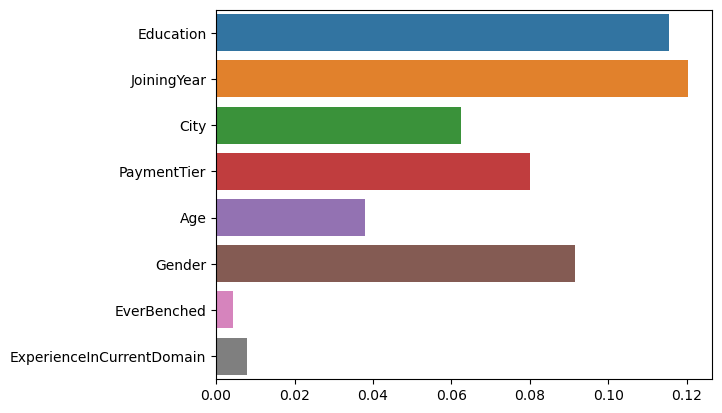

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.show()

In [52]:
imp_df = pre_df[['JoiningYear', 'Education', 'Gender','LeaveOrNot']]
imp_df.reset_index()
imp_df

,JoiningYear,Education,Gender,LeaveOrNot
0,2014,0,0,0
1,2015,0,1,0
2,2017,1,1,0
3,2016,0,0,1
4,2017,1,1,0
...,...,...,...,...
3466,2012,0,1,0
3467,2015,0,0,1
3468,2012,0,0,1
3469,2017,0,0,1


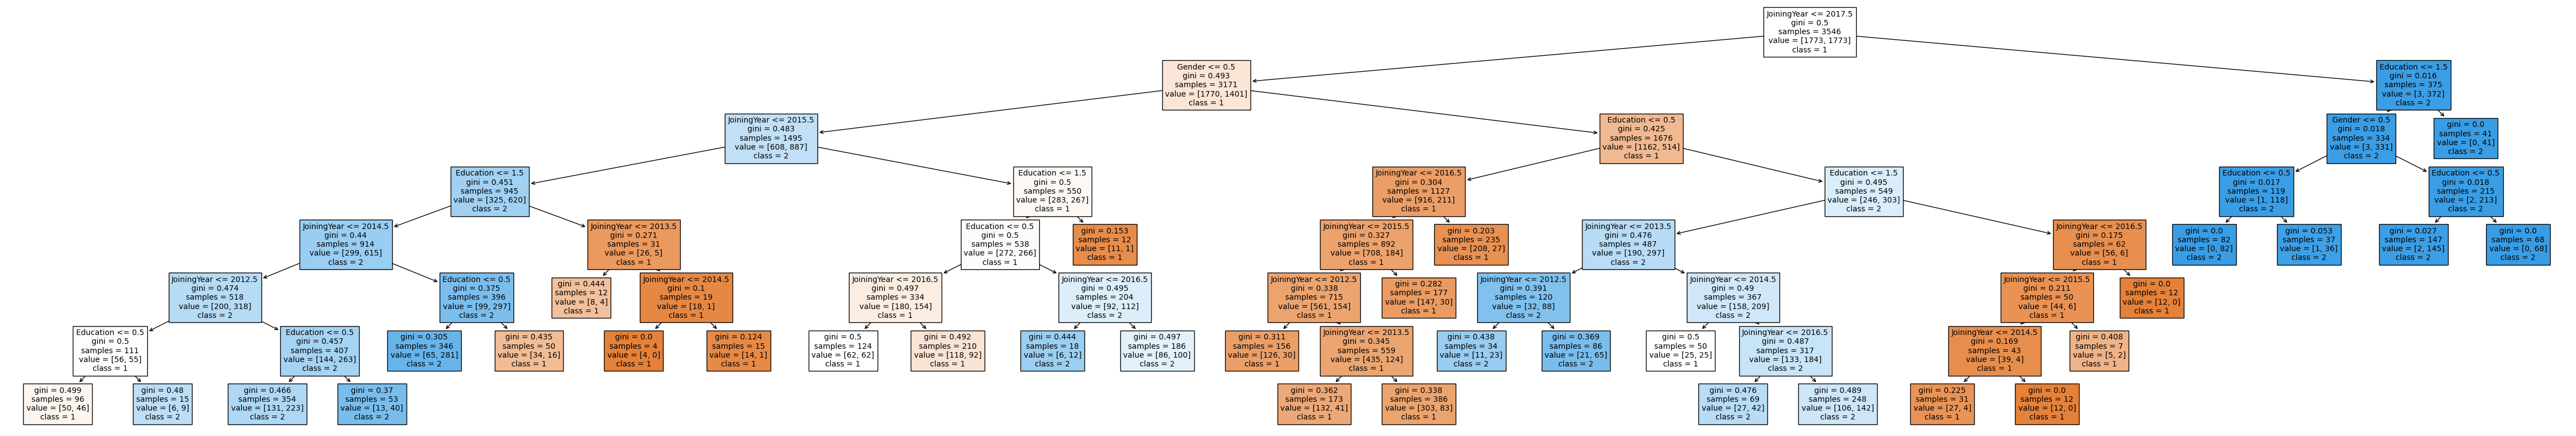

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 결정 트리 모델 초기화
dtc = DecisionTreeClassifier(max_depth=7, min_samples_split=13, random_state=124)

# 특성과 타겟 데이터 준비
features1, targets1 = imp_df.iloc[:,:-1] , imp_df.iloc[:,-1]
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, targets1, test_size=0.2, random_state=124)

# SMOTE를 사용하여 훈련 데이터 오버샘플링
smote = SMOTE(random_state=124)
X_train_over1, y_train_over1 = smote.fit_resample(X_train1, y_train1)

# 모델 훈련
dtc.fit(X_train_over1, y_train_over1)

# 결정 트리 시각화
plt.figure(figsize=(60,10))  # 그림 크기를 조정합니다.
plot_tree(dtc, feature_names=features1.columns, class_names=['1','2','3','4','5'], filled=True, fontsize=10)
plt.show()


In [54]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

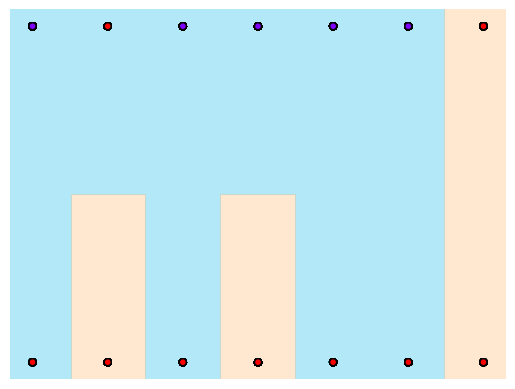

In [55]:
features_2_4 = features1.iloc[:,[0,2]]
visualize_boundary(dtc, features_2_4, targets)

In [56]:
print(g_dtc.best_params_, g_dtc.best_score_, sep='\n')
# max_depth -> 7 , min_samples_split -> 12 일때 최적의 파라미터 

{'max_depth': 7, 'min_samples_split': 12}
0.8251412429378531


In [57]:
g_knn.best_estimator_
# n_neighbors = 15 일때 최적의 파라미터 

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])

In [58]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=12)

#### ✨ 3 Cycle 
> #### **📌 오차행렬 수립**

#### 오차행렬 
> TP : 모델이 퇴사할 직원을 퇴사 예측으로 정확하게 분류한 경우
> 
> FP : 모델이 퇴사 하지 않은 정상 직원을 퇴사 직원으로 잘못 분류한 경우 (error 1)
> 
> TN : 모델이 정상 직원을 정상 직원으로 분류한 경우
> 
> FN : 모델이 퇴사할 직원을 정상 직원으로 잘못 분류한 경우 (error 2)
>
> 📃 임계치를 낮춰서 **재현율**를 높혀주는 것이 적합하다.
>
> (퇴사 예정된 직원을 퇴사 하지 않을 것이라고 예측 할 경우 회사 입장에서 면담 진행도 하지 못하고, 그대로 회사에 손실이 나는 오류가 치명적이기에 선정)

In [59]:
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_prediction)
dtc_recall = recall_score(y_test, dtc_prediction)
dtc_f1 = f1_score(y_test, dtc_prediction)

print('DTC')
print(f'정확도 : {dtc_score}')
print(f'재현율 : {dtc_recall}')
print(f'F1 Score : {dtc_f1}')


DTC
정확도 : 0.8575539568345324
재현율 : 0.7301587301587301
F1 Score : 0.7880085653104925


In [60]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_prediction)
knn_recall = recall_score(y_test, knn_prediction)
knn_f1 = f1_score(y_test, knn_prediction)

print('KNN')
print(f'정확도 : {knn_score}')
print(f'재현율 : {knn_recall}')
print(f'F1 Score : {knn_f1}')


KNN
정확도 : 0.758273381294964
재현율 : 0.626984126984127
F1 Score : 0.6528925619834711


In [61]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)

print('bagging(RFC)')
print(f'정확도 : {rfc_score}')
print(f'재현율 : {rfc_recall}')
print(f'F1 Score : {rfc_f1}')


bagging(RFC)
정확도 : 0.837410071942446
재현율 : 0.7182539682539683
F1 Score : 0.7621052631578947


In [62]:
svc_l = g_svc.best_estimator_
svc_l_prediction = svc_l.predict(X_test)
svc_l_score = accuracy_score(y_test, svc_l_prediction)
svc_l_recall = recall_score(y_test, svc_l_prediction)
svc_l_f1 = f1_score(y_test, svc_l_prediction)

print('SVC(linear)')
print(f'정확도 : {svc_l_score}')
print(f'재현율 : {svc_l_recall}')
print(f'F1 Score : {svc_l_f1}')


SVC(linear)
정확도 : 0.6201438848920864
재현율 : 0.5634920634920635
F1 Score : 0.5182481751824818


#### SVC (linear) 방식의 경우 다른 분류기에 비해 정확도 및 재현율과 F1 Score가 매우 낮은 것을 확인 할 수 있다.
> #### SVC 에서 kernel을 rbf로 변경해보자! -> 5 Cycle에서 진행

In [63]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_prediction)
ada_recall = recall_score(y_test, ada_prediction)
ada_f1 = f1_score(y_test, ada_prediction)

print('AdaBoost')
print(f'정확도 : {dtc_score}')
print(f'재현율 : {ada_recall}')
print(f'F1 Score : {ada_f1}')


AdaBoost
정확도 : 0.8575539568345324
재현율 : 0.6468253968253969
F1 Score : 0.6863157894736842


In [64]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, gbc_prediction)
gbc_recall = recall_score(y_test, gbc_prediction)
gbc_f1 = f1_score(y_test, gbc_prediction)

print('Gradient Boost')
print(f'정확도 : {gbc_score}')
print(f'재현율 : {gbc_recall}')
print(f'F1 Score : {gbc_f1}')


Gradient Boost
정확도 : 0.8201438848920863
재현율 : 0.7182539682539683
F1 Score : 0.7433264887063655


In [65]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)

print('XGBoost')
print(f'정확도 : {xgb_score}')
print(f'재현율 : {xgb_recall}')
print(f'F1 Score : {xgb_f1}')


XGBoost
정확도 : 0.8287769784172662
재현율 : 0.7301587301587301
F1 Score : 0.7556468172484601


In [66]:
lgbm = g_lgbm.best_estimator_
lg_prediction = lgbm.predict(X_test)
lg_score = accuracy_score(y_test, lg_prediction)
lg_recall = recall_score(y_test, lg_prediction)
lg_f1 = f1_score(y_test, lg_prediction)

print('LightGBM')
print(f'정확도 : {lg_score}')
print(f'재현율 : {lg_recall}')
print(f'F1 Score : {lg_f1}')


LightGBM
정확도 : 0.818705035971223
재현율 : 0.7023809523809523
F1 Score : 0.7374999999999999


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC: 0.8301
################################################################################


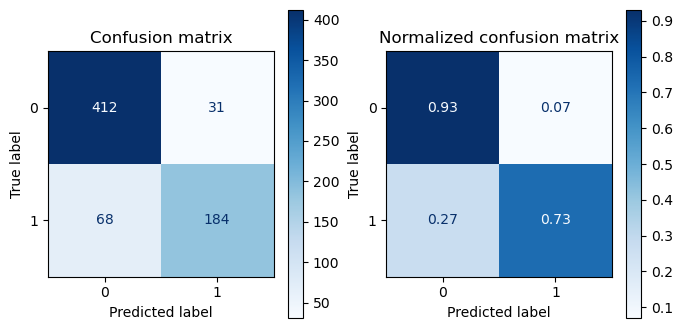

In [68]:
get_evaluation(y_test, dtc_prediction, dtc, X_test)
# dtc -> 81.10% , 재현율: 0.7375, F1: 0.7284,

오차 행렬
[[289 154]
 [110 142]]
정확도: 0.6201, 정밀도: 0.4797, 재현율: 0.5635, F1: 0.5182, ROC_AUC: 0.6079
################################################################################


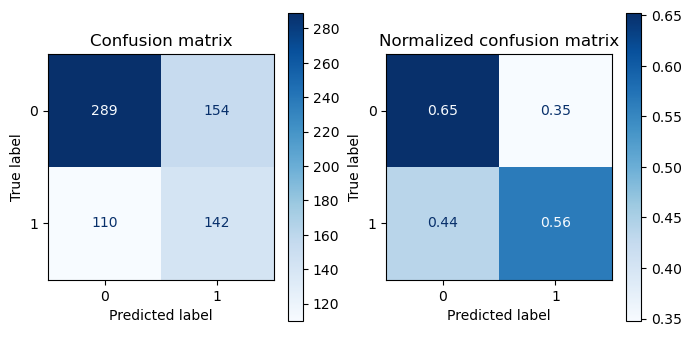

In [69]:
get_evaluation(y_test, svc_l_prediction, svc_l, X_test)
# svc-linear -> 62.01% 재현율: 0.5635,  F1: 0.5182

### SVC-linear 커널 
#### 정확도 : 0.6201 , F1 Score : 0.5182
#### 결론 도출 : 해당 데이터는 비선형 데이터 인것으로 추정 (rbf kernel이 적합하다!)

오차 행렬
[[369  74]
 [ 94 158]]
정확도: 0.7583, 정밀도: 0.6810, 재현율: 0.6270, F1: 0.6529, ROC_AUC: 0.7300
################################################################################


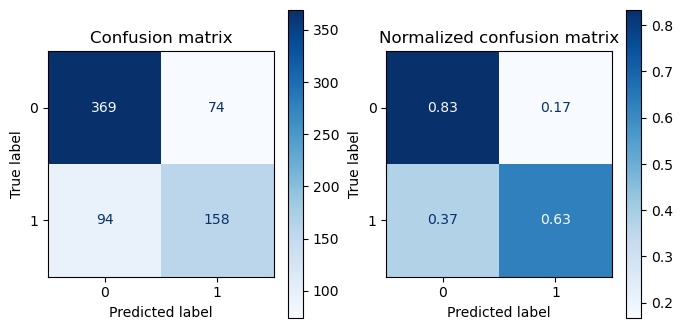

In [70]:
get_evaluation(y_test, knn_prediction, knn, X_test)
# knn -> 76.80% , 재현율: 0.6906, F1: 0.6717

오차 행렬
[[401  42]
 [ 71 181]]
정확도: 0.8374, 정밀도: 0.8117, 재현율: 0.7183, F1: 0.7621, ROC_AUC: 0.8117
################################################################################


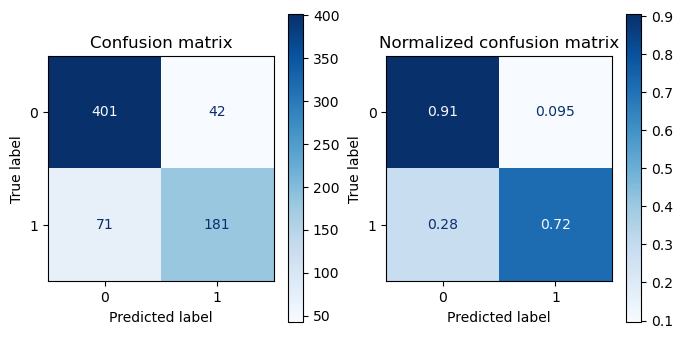

In [71]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)
# Bagging(RandomForest) = 정확도: 0.7353, 재현율: 0.5833, F1: 0.6151,

오차 행렬
[[383  60]
 [ 89 163]]
정확도: 0.7856, 정밀도: 0.7309, 재현율: 0.6468, F1: 0.6863, ROC_AUC: 0.7557
################################################################################


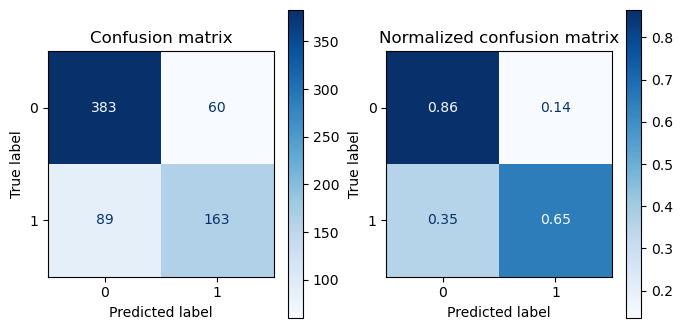

In [72]:
get_evaluation(y_test, ada_prediction, ada, X_test)
# AdaBoost = 정확도: 0.8067, 재현율: 0.7094, F1: 0.7161

오차 행렬
[[389  54]
 [ 71 181]]
정확도: 0.8201, 정밀도: 0.7702, 재현율: 0.7183, F1: 0.7433, ROC_AUC: 0.7982
################################################################################


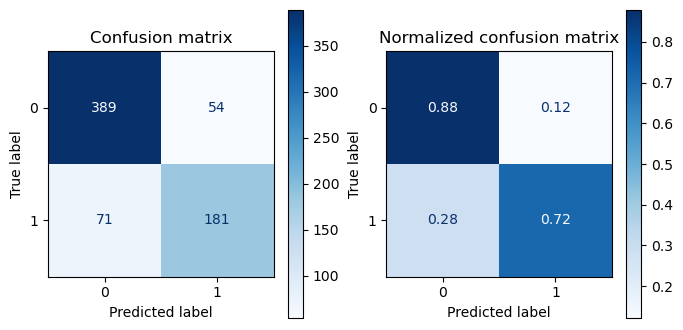

In [73]:
get_evaluation(y_test, gbc_prediction, gbc, X_test)
# GradientBoost = 정확도: 0.7511, 재현율: 0.5794, F1: 0.6280

오차 행렬
[[392  51]
 [ 68 184]]
정확도: 0.8288, 정밀도: 0.7830, 재현율: 0.7302, F1: 0.7556, ROC_AUC: 0.8075
################################################################################


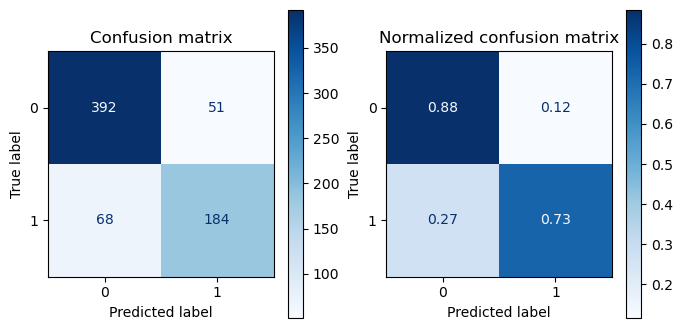

In [74]:
get_evaluation(y_test, xgb_prediction, xgb, X_test)
# XGBoost = 정확도: 0.7959, 재현율: 0.7406, F1: 0.7139

오차 행렬
[[392  51]
 [ 75 177]]
정확도: 0.8187, 정밀도: 0.7763, 재현율: 0.7024, F1: 0.7375, ROC_AUC: 0.7936
################################################################################


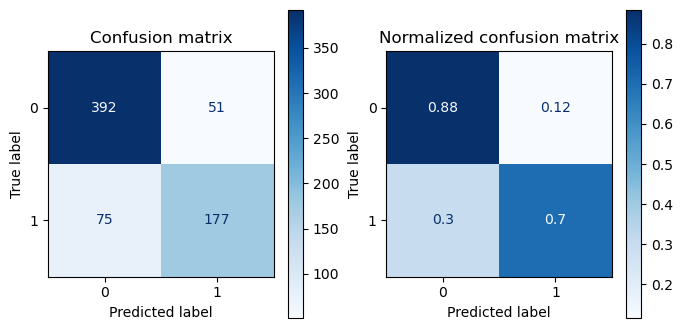

In [75]:
get_evaluation(y_test, lg_prediction, lgbm, X_test)
# Light GBM  = 정확도: 0.7981, 재현율: 0.7250, F1: 0.7117

#### 오차행렬 
> TP : 모델이 퇴사한 직원을 퇴사 예측으로 정확하게 분류한 경우
> 
> FP : 모델이 퇴사 하지 않은 정상 직원을 퇴사 직원으로 잘못 분류한 경우 (error 1)
> 
> TN : 모델이 정상 직원을 정상 직원으로 분류한 경우
> 
> FN : 모델이 퇴사한 직원을 정상 직원으로 잘못 분류한 경우 (error 2)
>
> 📃 임계치를 높혀서 **정밀도**를 높혀주는 것이 적합하다. (정상적으로 회사를 다니고 있는 직원을 퇴사 예정 직원으로 잘못 분류할 경우의 위험도가 더 크기 때문에)

### ✨ 4 Cycle 
#### **SVC-linear kernel 과 Bagging(RandomForest)를 사용하였을 경우 분류기별 점수 시각화**

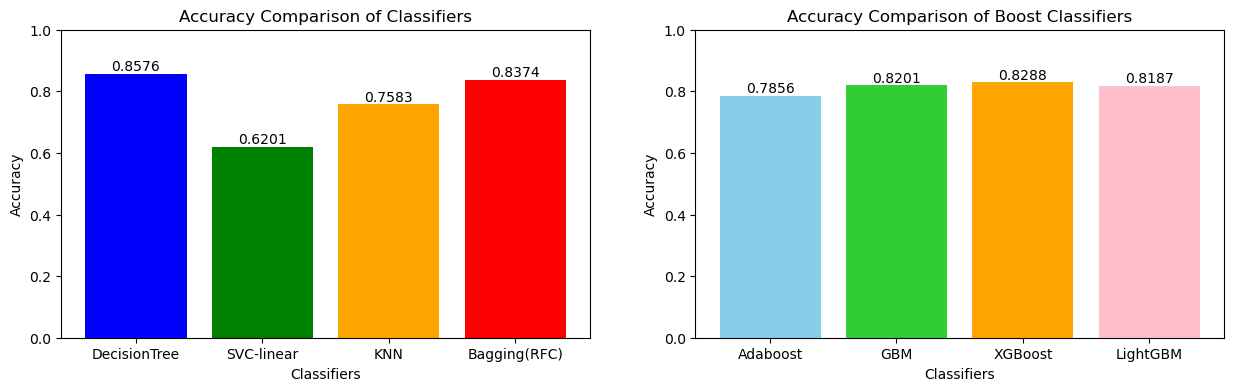

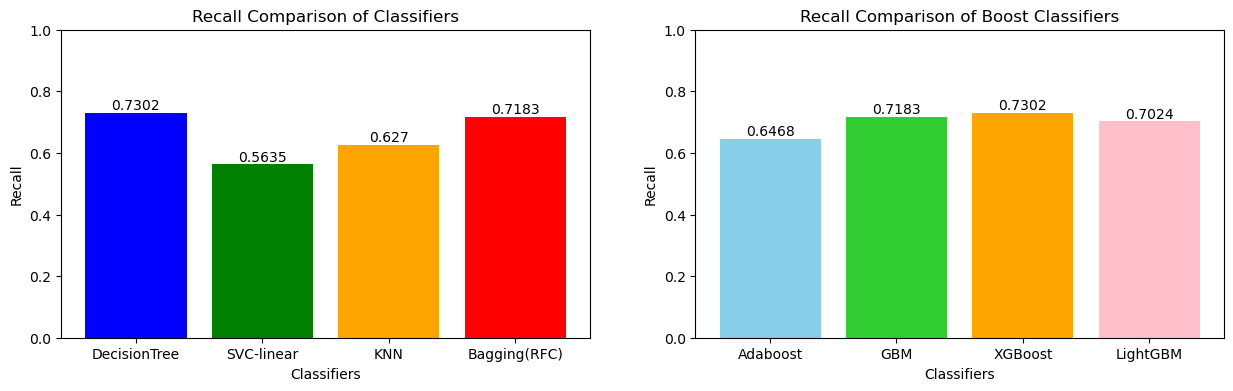

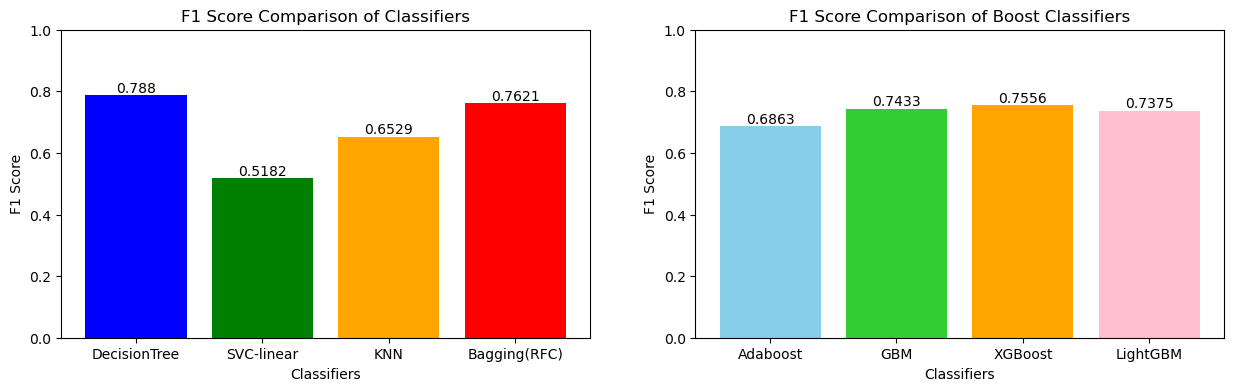

In [76]:
# ----------------- accuracy_score------------------------ #

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies1 = [dtc_score, # DTC
              svc_l_score, # SVC-linear
              knn_score, # KNN
              rfc_score, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-linear' ,'KNN', 'Bagging(RFC)']
for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
accuracies2 = [ada_score, # adaboost
              gbc_score, # gradient boost
              xgb_score, # XGBoost
              lg_score, # LightGBM
             ]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 

# ---------------precision_score------------------------#

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
precision1 = [dtc_recall, # DTC
              svc_l_recall, # SVC-linear
              knn_recall, # KNN
              rfc_recall, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-linear' ,'KNN', 'Bagging(RFC)']
for i, v in enumerate(precision1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, precision1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Recall')
    axes[0].set_title('Recall Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
precision2 = [ada_recall, # adaboost
              gbc_recall, # gradient boost
              xgb_recall, # XGBoost
              lg_recall, # LightGBM
             ]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(precision2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, precision2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Recall')
    axes[1].set_title('Recall Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 

# ---------------f1_score------------------------#

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# 첫 번째 바 차트 
# 색상 리스트 정의
colors1 = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
f1 = [dtc_f1, # DTC
              svc_l_f1, # SVC-linear
              knn_f1, # KNN
              rfc_f1, # Random Forest
             ]

classifiers1 = ['DecisionTree','SVC-linear' ,'KNN', 'Bagging(RFC)']
for i, v in enumerate(f1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, f1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('F1 Score')
    axes[0].set_title('F1 Score Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정


# 두 번째 바 차트 
# 색상 리스트 정의
colors2 = ['skyblue', 'limegreen', 'orange', 'pink']

# 각 분류기법 Accracy Score 리스트 
f2 = [ada_f1, # adaboost
      gbc_f1, # gradient boost
      xgb_f1, # XGBoost
      lg_f1] # LightGBM]

classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(f2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, f2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정
plt.show() 


### 💡 4 Cycle Result
> 분석결과 전체 분류기 중에서 가장 정확도가 높은 분류기는 0.8576이라는 정확도 점수를 기록한 DTC 분류기였으며, 재현율과 F1 Score 점수 모두 가장 높았습니다.
>
> #### **4 Cycle 결과로는 DTC 방식의 성능이 가장 좋은 것을 확인**

### 💡4-1 Cycle 
> #### **DTC분류기를 사용하여 임계치 조정**

In [77]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = g_dtc.predict_proba(X_test)
prediction = g_dtc.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [79]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC: 0.8301
################################################################################


In [80]:
thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57,  0.59, 0.6, 0.7, 0.8, 0.9]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.24
오차 행렬
[[288 155]
 [ 34 218]]
정확도: 0.7281, 정밀도: 0.5845, 재현율: 0.8651, F1: 0.6976, ROC_AUC: 0.7576
################################################################################
0.3
오차 행렬
[[310 133]
 [ 35 217]]
정확도: 0.7583, 정밀도: 0.6200, 재현율: 0.8611, F1: 0.7209, ROC_AUC: 0.7804
################################################################################
0.4
오차 행렬
[[377  66]
 [ 46 206]]
정확도: 0.8388, 정밀도: 0.7574, 재현율: 0.8175, F1: 0.7863, ROC_AUC: 0.8342
################################################################################
0.5
오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC: 0.8301
################################################################################
0.51
오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC: 0.8301
################################################################################
0.52
오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC:

### ✨ 4-1 Cycle Start
> 임계치(Threshold : 0.4) & 기본 임계치 (Threshold : 0.5) 비교 시각화

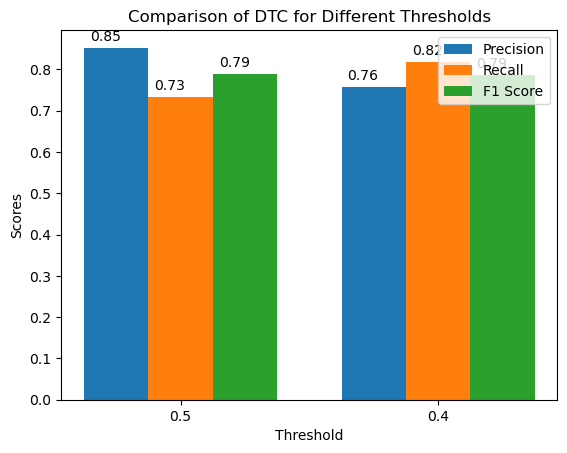

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Threshold 값 설정
thresholds = [0.5, 0.4]

# 각 지표의 점수 계산
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    # Bagging 모델 예측
    rfc_prediction = (g_dtc.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    # 정밀도 계산
    precision = precision_score(y_test, rfc_prediction)
    precision_scores.append(precision)
    # 재현율 계산
    recall = recall_score(y_test, rfc_prediction)
    recall_scores.append(recall)
    # F1 점수 계산
    f1 = f1_score(y_test, rfc_prediction)
    f1_scores.append(f1)

# 그래프 생성
x = np.arange(len(thresholds))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1 Score')

# 그래프 라벨 및 제목 설정
ax.set_xlabel('Threshold')
ax.set_ylabel('Scores')
ax.set_title('Comparison of DTC for Different Thresholds')
ax.set_xticks(x)
ax.set_xticklabels(thresholds)
ax.legend()

# 그래프에 점수 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()



### 💡 4-1 Cycle Result
> #### **만약 해당 데이터세트에서 DTC 분류 모델을 사용할 것이라면 임계치를 0.4로 낮추어서 재현율을 높히는 방안을 권장합니다.**
>
> **📊 재현율 0.73에서 0.8175 로 증가 & F1 Score는 0.79로 괜찮은 수치를 유지**
>
> 다음은 SVC 모델에서 커널을 linear로 할때와 rbf 커널로 사용했을 때를 비교해보도록 하겠습니다.

### ✨ 5 Cycle
#### **SVC kernel (linear vs rbf)**
> 우선 기존 SVC 모델에서 kernel을 rbf 로 변경하고 추가로 gamma 하이퍼파라미터 값을 선언합니다.

In [82]:
# SVC 파라미터 선언 (커널을 rbf로  설정)
svc_parameters = {'svc__C': [0.01, 0.1, 1, 10, 100],
                  'svc__gamma' : [0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['rbf']
                 }

# SVC 클래스 설정 (커널을 rbf로 설정)
svc = SVC(kernel='rbf', probability=True)

# SVC 파이프라인 구축, 교차 검증 수행
svc_pipe_r = Pipeline([('svc', svc)])
g_svc_r = GridSearchCV(svc_pipe_r, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_svc_r.fit(X_train_over, y_train_over)


GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf']},
             return_train_score=True)

In [83]:
result_df = pd.DataFrame(g_svc_r.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.01, 'svc__gamma': 0.01, 'svc__ker...",0.588418,25
1,"{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kern...",0.662147,22
2,"{'svc__C': 0.01, 'svc__gamma': 1, 'svc__kernel...",0.697175,18
3,"{'svc__C': 0.01, 'svc__gamma': 10, 'svc__kerne...",0.655650,23
4,"{'svc__C': 0.01, 'svc__gamma': 100, 'svc__kern...",0.641808,24
5,"{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...",0.677966,21
6,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.740113,16
7,"{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...",0.785593,8
8,"{'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...",0.683898,20
9,"{'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...",0.687853,19


In [84]:
pd.set_option('display.max_columns', None)

In [85]:
kernel_values = result_df['params'].apply(lambda x: x['svc__kernel'])
print(kernel_values)
# 모두 비선형 데이터

0     rbf
1     rbf
2     rbf
3     rbf
4     rbf
5     rbf
6     rbf
7     rbf
8     rbf
9     rbf
10    rbf
11    rbf
12    rbf
13    rbf
14    rbf
15    rbf
16    rbf
17    rbf
18    rbf
19    rbf
20    rbf
21    rbf
22    rbf
23    rbf
24    rbf
Name: params, dtype: object


#### 📌 SVC(kernel:rbf) 일 때의 Feature별 중요도 비중 확인

In [86]:
from sklearn.inspection import permutation_importance
# DTC importance
importance = permutation_importance(g_svc_r, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([1, 0, 5, 3, 2, 4, 7, 6], dtype=int64)

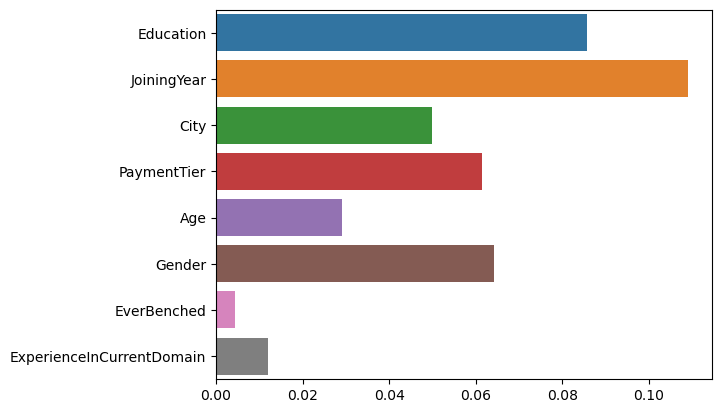

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.show()

#### SVC(rbf) 분류 결과 permutation Importance
<img src='./images/corr.png'><img src='./images/hit.png' width='400px'>

> 비선형 데이터(kernel : rbf)일 경우에 SVC 로 분류한 결과 입사연도가 가장 중요도가 높았으며, 그 다음으로 학력사항, 성별과  연봉등급의 중요도가 높은 것을 확인 하였습니다. 
>
> rbf 커널로 설정한 SVC의 성능결과를 추출 해야 합니다.
> 
> image1

In [88]:
print(g_svc_r.best_params_, g_svc_r.best_score_, sep='\n')

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.8285310734463277


In [89]:
g_svc_r.best_estimator_

Pipeline(steps=[('svc', SVC(C=10, gamma=0.1, probability=True))])

In [90]:
svc_r = g_svc_r.best_estimator_
svc_r_prediction = svc_r.predict(X_test)
svc_r_score = accuracy_score(y_test, svc_r_prediction)
svc_r_recall = recall_score(y_test, svc_r_prediction)
svc_r_f1 = f1_score(y_test, svc_r_prediction)

print(f'정확도 : {svc_r_score}')
print(f'재현율 : {svc_r_recall}')
print(f'F1 Score : {svc_r_f1}')

정확도 : 0.8100719424460432
재현율 : 0.7142857142857143
F1 Score : 0.7317073170731706


오차 행렬
[[383  60]
 [ 72 180]]
정확도: 0.8101, 정밀도: 0.7500, 재현율: 0.7143, F1: 0.7317, ROC_AUC: 0.7894
################################################################################


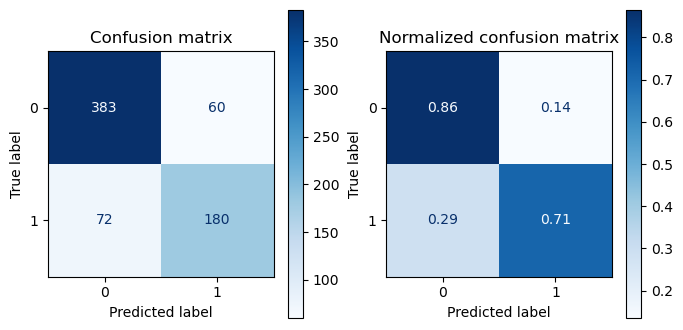

In [91]:
get_evaluation(y_test, svc_r_prediction, svc_r, X_test)
# svc-rbf : 정확도: 0.7777 , 재현율: 0.6719, F1: 0.6750

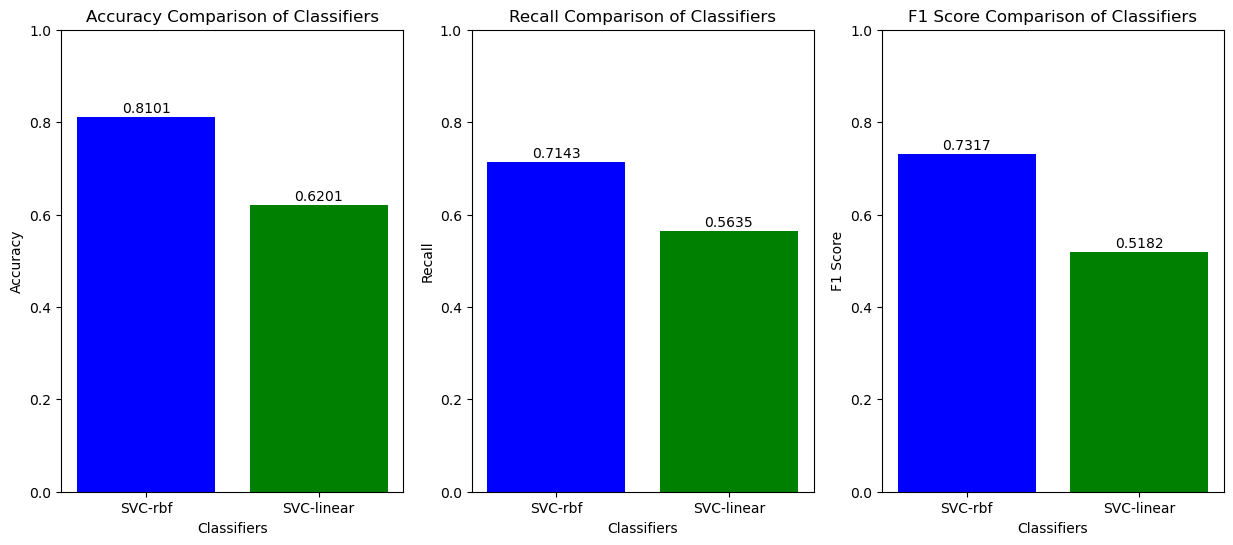

In [92]:
fig , axes = plt.subplots(1,3, figsize=(15,6))
colors = ['blue', 'green', 'orange', 'red','purple']

# 각 분류기법 Accracy Score 리스트 
accuracies = [svc_r_score, # SVC-rbf
              svc_l_score, # SVC-linear
             ]

precision = [svc_r_recall, # SVC-rbf
              svc_l_recall, # SVC-linear
             ]

f1_score = [svc_r_f1, # SVC-rbf
              svc_l_f1, # SVC-linear
             ]

classifiers = ['SVC-rbf','SVC-linear' ]
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(precision):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, precision, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Recall')
    axes[1].set_title('Recall Comparison of Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(f1_score):
    axes[2].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[2].bar(classifiers, f1_score, color=colors)
    axes[2].set_xlabel('Classifiers')
    axes[2].set_ylabel('F1 Score')
    axes[2].set_title('F1 Score Comparison of Classifiers')
    axes[2].set_ylim(0, 1)  # y축 범위 설정

plt.show() 

### 💡 5 Cycle Start
> #### SVC-rbf 오차행렬 & 각 통계 점수 (정확도 81%) ,(재현율 0.7143) , (F1 Score 0.7317)
> 
> 
> #### SVC-linear 오차행렬 & 각 통계 점수 (정확도 62.01%) ,(재현율 0.5635) , (F1 Score 0.5182)
>
>
> #### 📌해당 데이터세트에서는 SVC 분류 시 rbf 커널을 사용하는 것이 더 효과적입니다.
> ####  **즉 해당 데이터세트내의 데이터들은 비선형 데이터 인 것을 확인 할 수 있습니다.**
>
> 그 다음 Cycle 에서는 앙상블 학습 기법의 Voting 분류기법을 사용하여 각각 hardvoting 결과와 softvoting 결과 차이를 분석하겠습니다.

### ✨ 6 Cycle
#### **Voting (hard vs soft)**
> 기존 RandomForest 알고리즘을 활용한 bagging 분류 기법에서 이제 Voting 분류 기법으로 적용 해보고, hard, soft voting 을 사용해서 각각의 정확도와 정밀도 및 F1 Score점수를 산출 해보도록 하겠습니다.

In [93]:
from sklearn.ensemble import VotingClassifier
# 정확도: 0.8012, 정밀도: 0.8059, 재현율: 0.8064, F1: 0.8012, ROC_AUC: 0.8064
vc_hard = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe),('knn',knn_pipe), ('ada',g_ada),
                                      ('xgb',xgb)], voting='hard', n_jobs=-1)


# 정확도: 0.8193, 정밀도: 0.8179, 재현율: 0.8190, F1: 0.8183, ROC_AUC: 0.8190
vc_soft = VotingClassifier(estimators=[('dtc', dtc),('svc',svc_pipe),('knn',knn_pipe), ('ada',g_ada),
                                      ('xgb',xgb)], voting='soft', n_jobs=-1)

In [94]:
vc_hard.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=12)),
                             ('svc',
                              Pipeline(steps=[('svc',
                                               SVC(kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('knn',
                                               KNeighborsClassifier())])),
                             ('ada',
                              GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.3,
                                                                         0.5,
                                                                         0.7,
                                                                         1],
                                                       'n_estimators': [5...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1)

In [95]:
vc_h_prediction = vc_hard.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


vc_hard_score = accuracy_score(y_test, vc_h_prediction)
vc_hard_recall = recall_score(y_test, vc_h_prediction)
vc_hard_f1 = f1_score(y_test, vc_h_prediction)

print(f'정확도 : {vc_hard_score}')
print(f'재현율 : {vc_hard_recall}')
print(f'F1 Score : {vc_hard_f1}')
# voting (hard) = 정확도 : 81.09% , 재현율 : 0.7312 , F1 Score : 0.726708

정확도 : 0.8172661870503597
재현율 : 0.7063492063492064
F1 Score : 0.7370600414078676


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[390  53]
 [ 74 178]]
정확도: 0.8173, 정밀도: 0.7706, 재현율: 0.7063, F1: 0.7371, ROC_AUC: 0.7934
################################################################################


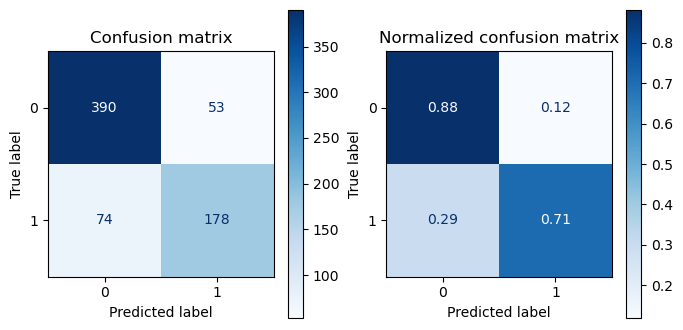

In [98]:
get_evaluation(y_test, vc_h_prediction, vc_hard, X_test)

# voting(hard) = 정확도: 0.8110 , 재현율: 0.7312, F1: 0.7267

In [99]:
vc_soft.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=12)),
                             ('svc',
                              Pipeline(steps=[('svc',
                                               SVC(kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('knn',
                                               KNeighborsClassifier())])),
                             ('ada',
                              GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.3,
                                                                         0.5,
                                                                         0.7,
                                                                         1],
                                                       'n_estimators': [5...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1, voting='soft')

In [100]:
vc_s_prediction = vc_soft.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

vc_soft_score = accuracy_score(y_test, vc_s_prediction)
vc_soft_recall = recall_score(y_test, vc_s_prediction)
vc_soft_f1 = f1_score(y_test, vc_s_prediction)

print(f'정확도 : {vc_soft_score}')
print(f'재현율 : {vc_soft_recall}')
print(f'F1 Score : {vc_soft_f1}')
# voting (soft) = 82%

정확도 : 0.8215827338129497
재현율 : 0.7063492063492064
F1 Score : 0.7416666666666667


오차 행렬
[[393  50]
 [ 74 178]]
정확도: 0.8216, 정밀도: 0.7807, 재현율: 0.7063, F1: 0.7417, ROC_AUC: 0.7967
################################################################################


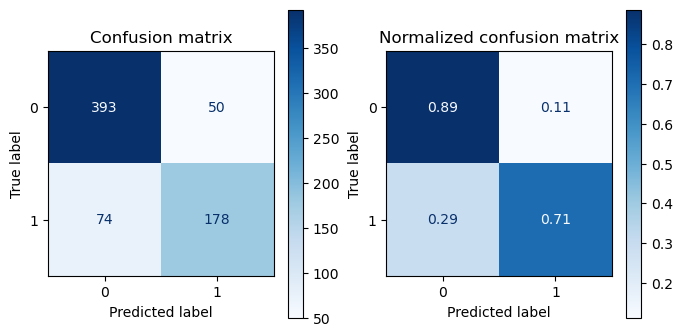

In [102]:
get_evaluation(y_test, vc_s_prediction, vc_soft, X_test)

# voting(soft) = 정확도: 0.8216, 재현율: 0.7063, F1: 0.7417

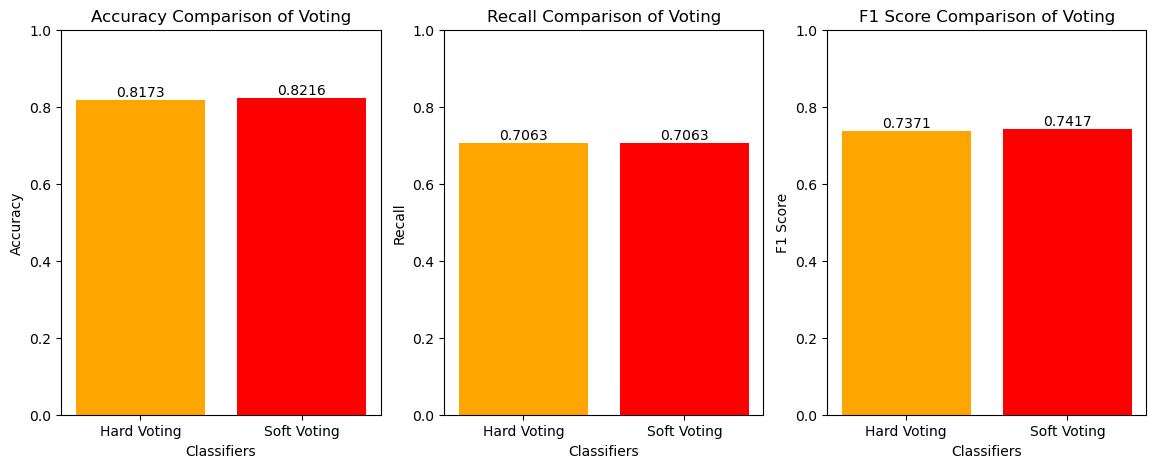

In [103]:
fig , axes = plt.subplots(1,3, figsize=(14,5))
colors = ['orange','red']

# 각 분류기법 Accracy Score 리스트 
accuracies = [vc_hard_score, # Hard Voting
              vc_soft_score, # Soft Voting
             ]

recall = [vc_hard_recall, vc_soft_recall]

f1_score = [vc_hard_f1, vc_soft_f1]

classifiers = ['Hard Voting','Soft Voting' ]
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Voting')
    axes[0].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(recall):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, recall, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Recall')
    axes[1].set_title('Recall Comparison of Voting')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(f1_score):
    axes[2].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[2].bar(classifiers, f1_score, color=colors)
    axes[2].set_xlabel('Classifiers')
    axes[2].set_ylabel('F1 Score')
    axes[2].set_title('F1 Score Comparison of Voting')
    axes[2].set_ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 6 Cycle Result
> #### Hard Voting 오차행렬 & 각 통계 점수 (정확도 81.11%) , (재현율 0.7312),  (F1 Score 0.7267)
> 

>
> 
> #### Soft Voting 오차행렬 & 각 통계 점수 (정확도 81.74%), (재현율 0.7438), (F1 Score 0.7368)
> 
>
> #### 📌해당 데이터세트에서는 Voting 분류 시 Soft Voting이 적합합니다.

### ✨ 4 Cycle
#### **Voting(hard) vs Bagging(RandomForest)**
> 해당 데이터 세트에서 적합한 Ensemble 분류 모델 중에서 Voting 방식과 Bagging 방식을 서로 비교해보고 더 적합한 분류 기법을 찾겠습니다.

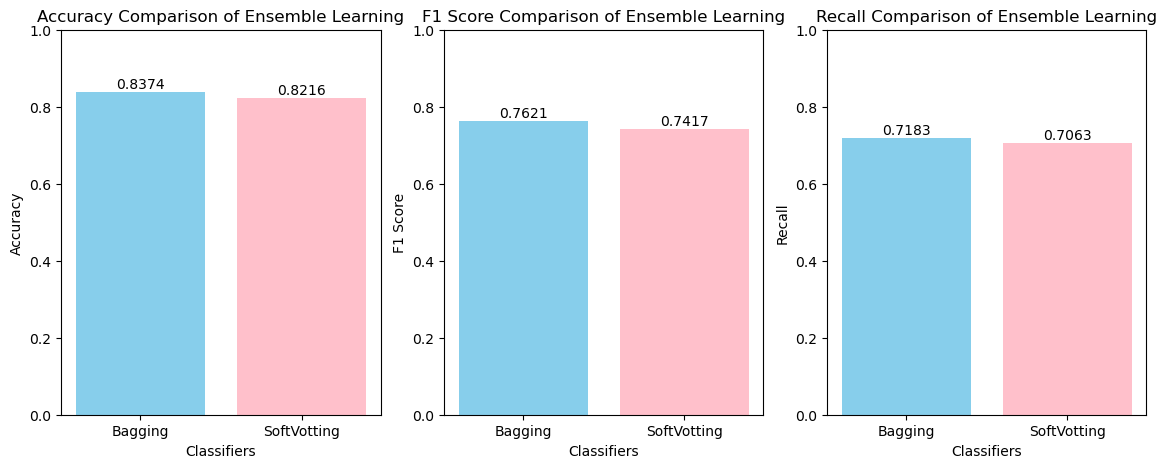

In [104]:
## Bagginhg 방식이 Votting 방식보다 더 정확도가 높은 것을 확인 
# 색상 리스트 정의
fig , axes = plt.subplots(1,3, figsize=(14,5))

colors = ['skyblue', 'pink']

accuracies = [rfc_score,
              vc_soft_score,]

f1_scores = [rfc_f1, vc_soft_f1]

precision = [rfc_recall, vc_hard_recall]

classifiers = ['Bagging', 'SoftVotting']

for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers, accuracies, color=colors)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Ensemble Learning')
    axes[0].set_ylim(0, 1)  # y축 범위 설정
    
for i, v in enumerate(f1_scores):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers, f1_scores, color=colors)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('F1 Score')
    axes[1].set_title('F1 Score Comparison of Ensemble Learning')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

for i, v in enumerate(precision):
    axes[2].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[2].bar(classifiers, precision, color=colors)
    axes[2].set_xlabel('Classifiers')
    axes[2].set_ylabel('Recall')
    axes[2].set_title('Recall Comparison of Ensemble Learning')
    axes[2].set_ylim(0, 1)  # y축 범위 설정
plt.show() 

### 💡 6 Cycle Result

#### Soft Voting 오차행렬 & 각 통계 점수 (정확도 82.16%) , (F1 Score 0.7417) , (재현율 0.7063)
> 
>
> 
> #### (RandomForest) Bagging 오차행렬 & 각 통계 점수 (정확도 82.88%), (F1 Score 0.7495), (재현율 0.7063)

>
> #### 📌해당 데이터세트에서는 Voting 방식보다 Bagging 방식으로 분류하는 것이 더 적합합니다.

### 📊 Total Result

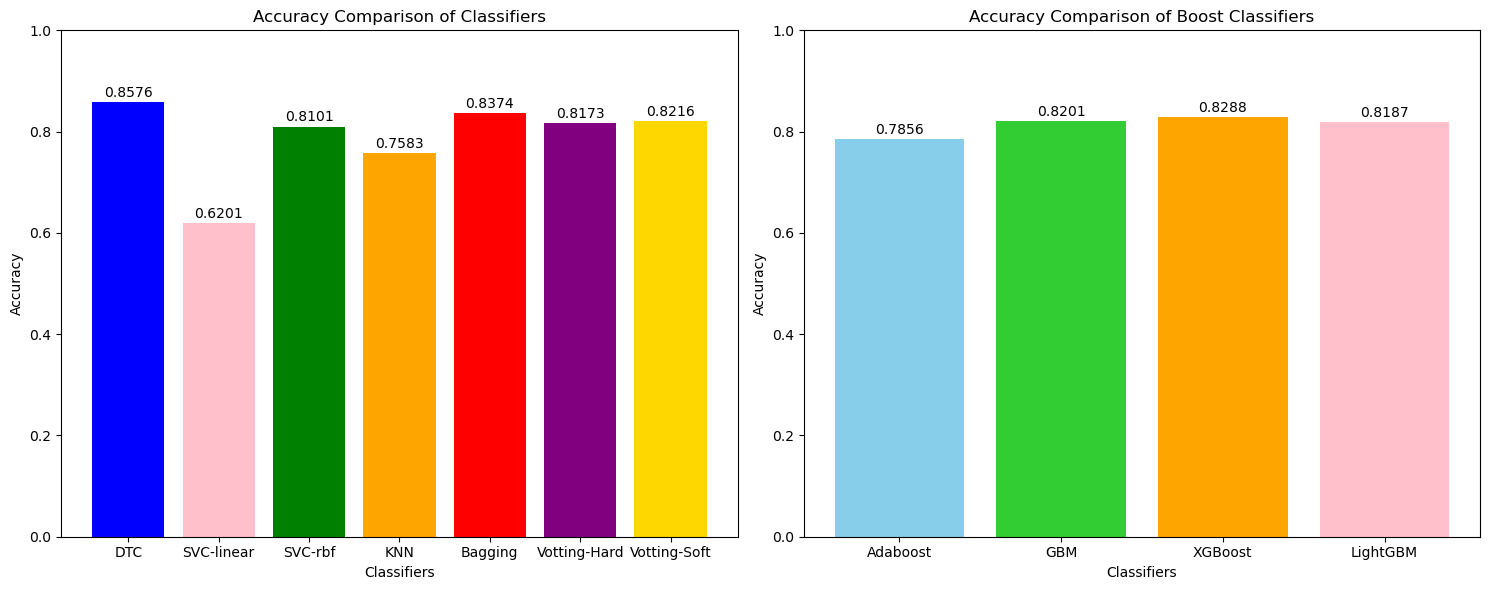

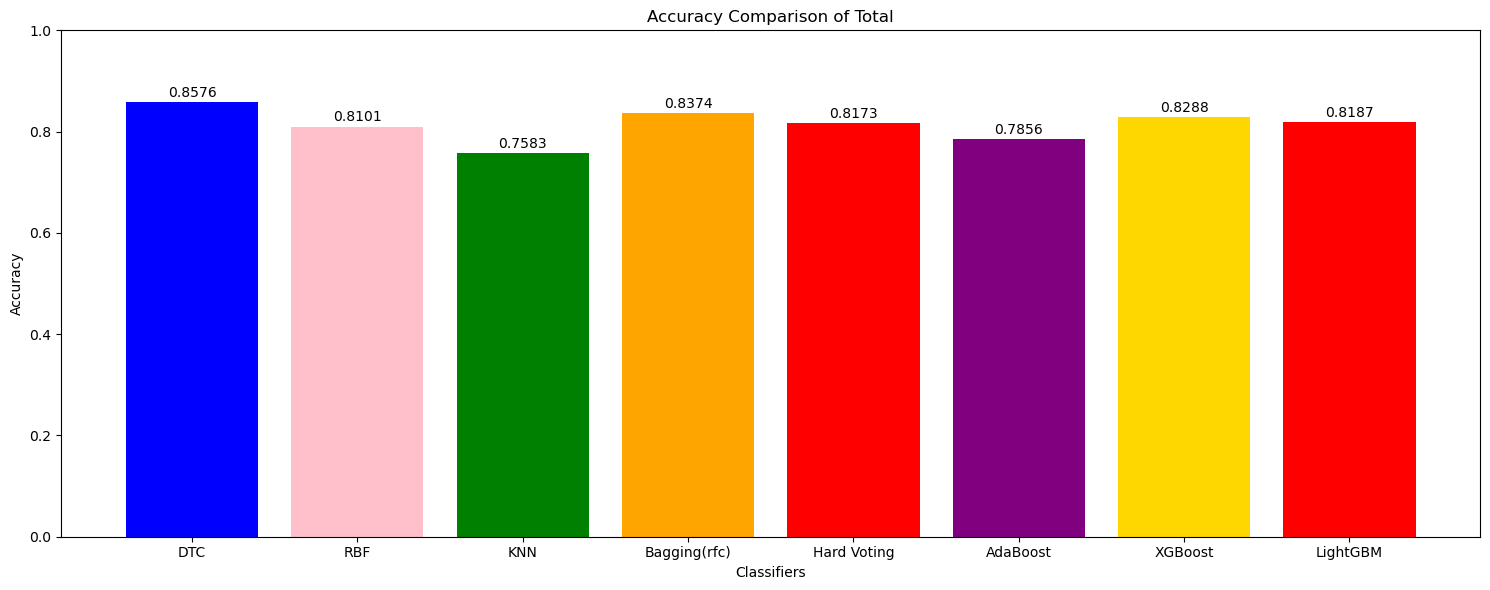

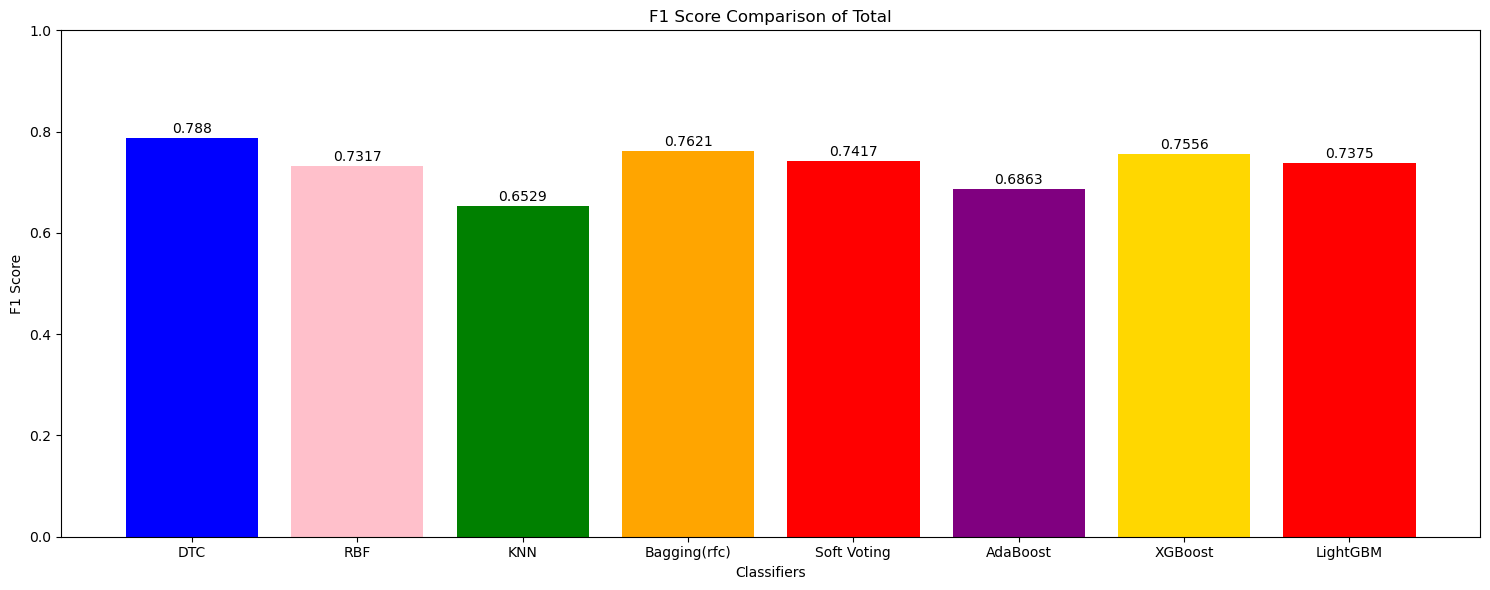

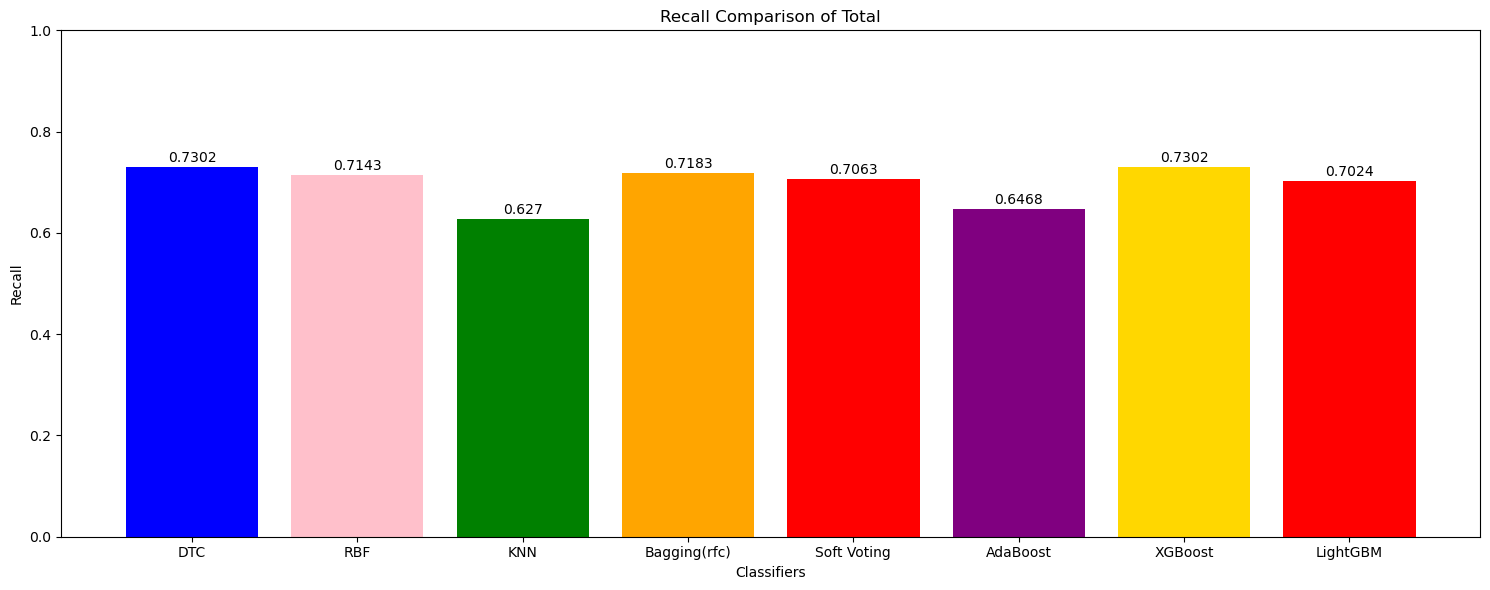

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 첫 번째 바 차트
colors1 = ['blue', 'pink','green', 'orange', 'red', 'purple', 'gold']
accuracies1 = [dtc_score, svc_l_score, svc_r_score, knn_score, rfc_score, vc_hard_score, vc_soft_score]
classifiers1 = ['DTC', 'SVC-linear' ,'SVC-rbf', 'KNN', 'Bagging', 'Votting-Hard' , 'Votting-Soft']

for i, v in enumerate(accuracies1):
    axes[0].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[0].bar(classifiers1, accuracies1, color=colors1)
    axes[0].set_xlabel('Classifiers')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy Comparison of Classifiers')
    axes[0].set_ylim(0, 1)  # y축 범위 설정




# 두 번째 바 차트

colors2 = ['skyblue', 'limegreen', 'orange', 'pink']
accuracies2 = [ada_score, gbc_score, xgb_score, lg_score]
classifiers2 = ['Adaboost', 'GBM', 'XGBoost', 'LightGBM']
for i, v in enumerate(accuracies2):
    axes[1].text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    axes[1].bar(classifiers2, accuracies2, color=colors2)
    axes[1].set_xlabel('Classifiers')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy Comparison of Boost Classifiers')
    axes[1].set_ylim(0, 1)  # y축 범위 설정

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(15, 6))
colors3 = ['blue', 'pink','green', 'orange', 'red', 'purple', 'gold' ,'red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies3 = [dtc_score, svc_r_score, knn_score, rfc_score, vc_hard_score, ada_score ,xgb_score, lg_score]
classifiers3 = ['DTC', 'RBF' ,'KNN', 'Bagging(rfc)', 'Hard Voting', 'AdaBoost', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(15, 6))
colors3 = ['blue', 'pink','green', 'orange', 'red', 'purple', 'gold' ,'red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies3 = [dtc_f1, svc_r_f1, knn_f1, rfc_f1, vc_soft_f1, ada_f1 ,xgb_f1, lg_f1]
classifiers3 = ['DTC', 'RBF' ,'KNN', 'Bagging(rfc)', 'Soft Voting', 'AdaBoost', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(figsize=(15, 6))
colors3 = ['blue', 'pink','green', 'orange', 'red', 'purple', 'gold' ,'red','orange','gold','limegreen','blue','black','purple', 'pink']
accuracies3 = [dtc_recall, svc_r_recall, knn_recall, rfc_recall, vc_soft_recall, ada_recall ,xgb_recall, lg_recall]
classifiers3 = ['DTC', 'RBF' ,'KNN', 'Bagging(rfc)', 'Soft Voting', 'AdaBoost', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Recall')
    plt.title('Recall Comparison of Total')
    plt.ylim(0, 1)  # y축 범위 설정
plt.tight_layout()
plt.show()


### 📊 Middle Result
> 최종 분류 예측 결과 직원들의 퇴사 여부를 예측 하는 데이터에서는 , DTC 분류기의 정확도가 85% , F1 Score는 0.788, 재현율은 0.7302로 가장 높았으며, 이는 곧 분류 시에 가장 적합한 모델인 것을 의미합니다.
>
> 따라서 해당 데이터 세트에서 권장하는 분류 기법은 DTC 모델 입니다.
>
> 저는 DTC 분류 기법을 사용해서 중요도가 높은 Feature들의 분포를 맞추어 주고, 다시 학습을 시킨 뒤
>
> 마지막으로 임계치를 조절해보겠습니다.

#### 7 Cycle 
> #### 중요도 높은 Feature(Education)의 분포를 맞추겠습니다. (under sampling)

In [106]:
from sklearn.inspection import permutation_importance
# RFC importance
importance = permutation_importance(g_dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([1, 0, 5, 3, 2, 4, 7, 6], dtype=int64)

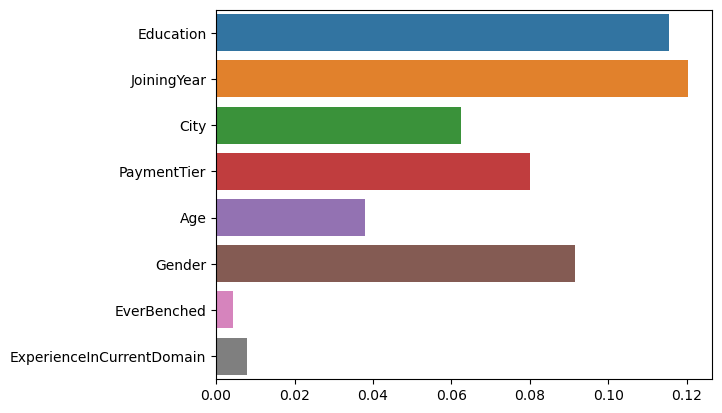

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=importance.importances_mean, y=features.columns)
plt.show()

<img src='./images/corr.png'><img src='./images/hit.png' width='400px'>

#### 기존 Correlation 과 Permutation Importance 비교
> 최종 Feature 중요도 순위
> 1. 입사연도
> 2. 학력사항
> 3. 성별
>
> 연봉등급은 삭제 처리 -> Gender와 상관관계가 있었던 점을 고려해보면 기존 correlation에서의 비중도 Gender가 더 높았고, 매우 3등급에 치우쳐져있는 분포를 보이기 때문에 학력사항 까지 언더샘플링을 하는데 연봉등급까지 해버리면 엄청난 데이터 손실 문제 때문에 PaymentTier는 삭제 처리 하기로함
>
> City도 삭제 처리 -> 가장 우수한 성능을 가진 DTC 모델에서는 City의 중요도 비중이 그리 높지 않기 때문에 삭제처리

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'EverBenched'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

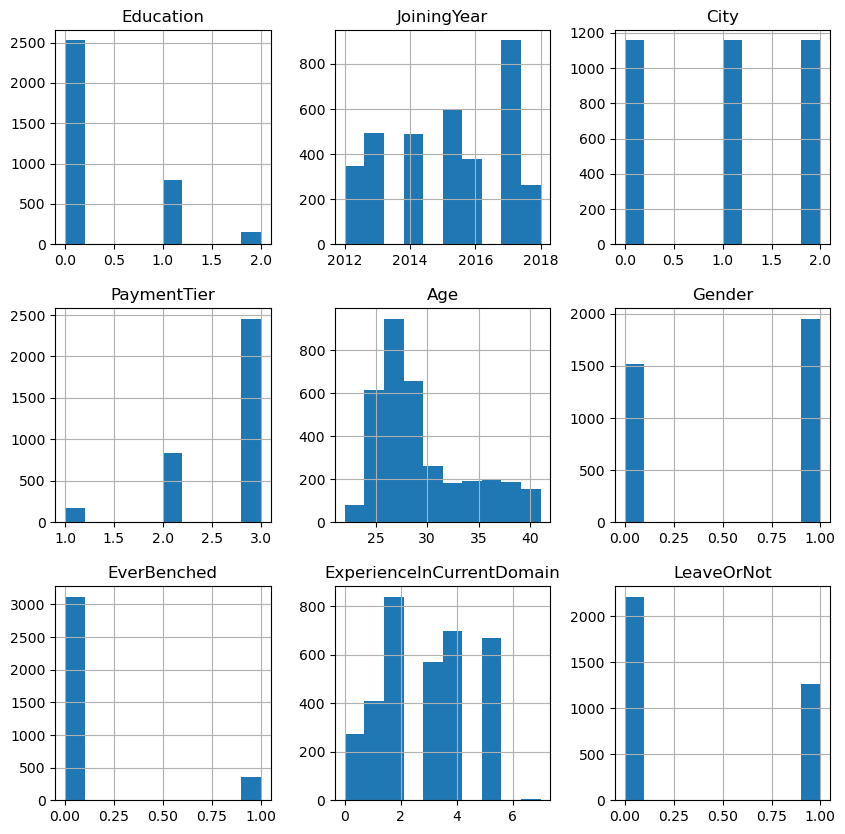

In [108]:
pre_df.hist(figsize=(10,10))

In [109]:
pre_df = pre_df.drop(labels=['PaymentTier', 'EverBenched', 'ExperienceInCurrentDomain', 'Age', 'City'], axis=1)

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

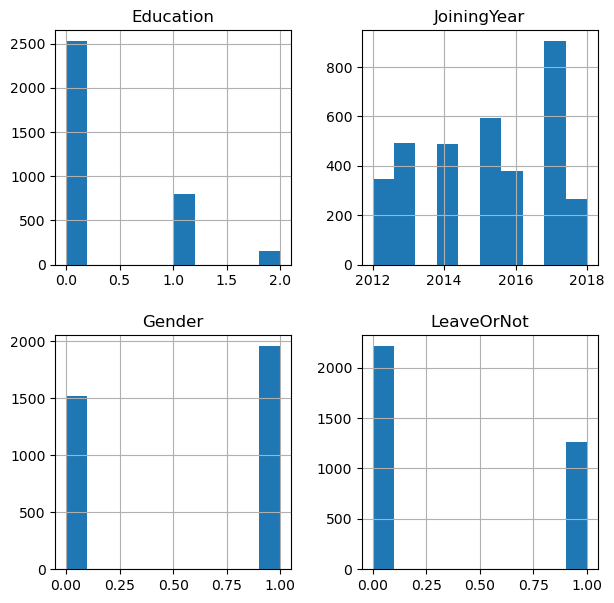

In [110]:
pre_df.hist(figsize=(7,7))

#### Education (분포 맞추기)

In [111]:
pre_df['Education'].value_counts()
# Education : (0: 학사 ,1 : 석사, 2: 박사)
# 학사 졸업이 가장 많은 비중을 차지 하기 때문에, 학사 졸업 직원들만 따로 저장해서 가져가기로 한다.

Education
0    2526
1     795
2     150
Name: count, dtype: int64

In [112]:
# 언더 샘플링 시행
City1 = pre_df[pre_df.Education == 0].sample(150, random_state=124)
City2 = pre_df[pre_df.Education == 1].sample(150, random_state=124)
City3 = pre_df[pre_df.Education == 2]

pre_df = pd.concat([City1, City2, City3]).reset_index(drop=True)

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'LeaveOrNot'}>]], dtype=object)

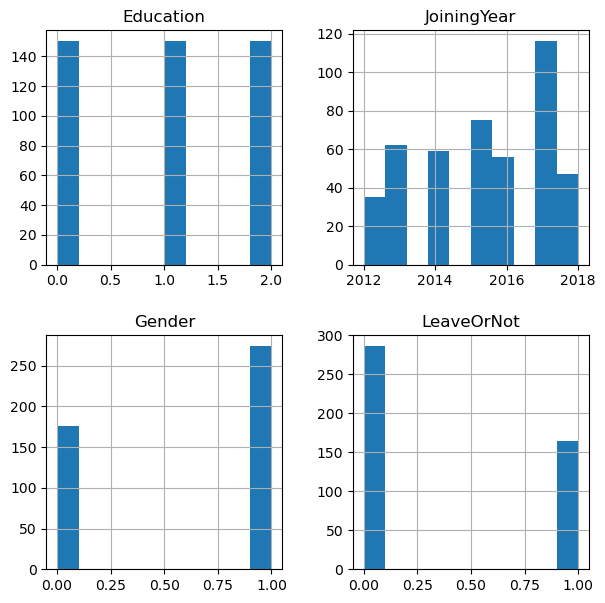

In [113]:
pre_df.hist(figsize=(7,7))

#### 해당 결과를 가지고 DTC 분류 학습 재개

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# DTC 파라미터 선언
dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split' :[12,13,14] }
dtc = DecisionTreeClassifier()
# 교차 검증 수행
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

In [115]:
g_dtc.fit(X_train_over, y_train_over)
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)
g_dtc

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 12}",0.801130,7
1,"{'max_depth': 5, 'min_samples_split': 13}",0.801130,7
2,"{'max_depth': 5, 'min_samples_split': 14}",0.801130,7
3,"{'max_depth': 6, 'min_samples_split': 12}",0.817232,4
4,"{'max_depth': 6, 'min_samples_split': 13}",0.817232,4
5,"{'max_depth': 6, 'min_samples_split': 14}",0.817232,4
6,"{'max_depth': 7, 'min_samples_split': 12}",0.825141,1
7,"{'max_depth': 7, 'min_samples_split': 13}",0.825141,1
8,"{'max_depth': 7, 'min_samples_split': 14}",0.825141,1


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [12, 13, 14]},
             return_train_score=True)

### 📈 DTC 분류 기법을 사용한 Confusion Matrix TEST

In [140]:
#이 코드는 Bagging을 사용하여 테스트 세트에 대한 예측을 수행하고, 각 예측의 확률을 출력.

proba = g_dtc.predict_proba(X_test)
prediction = g_dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.8333333333333334, 0.16666666666666666] 0
[0.75, 0.25] 0
[1.0, 0.0] 0
[0.0, 1.0] 1
[0.8523809523809524, 0.14761904761904762] 0
[1.0, 0.0] 0
[0.8813559322033898, 0.11864406779661017] 0
[0.7857142857142857, 0.21428571428571427] 0
[0.0, 1.0] 1
[0.5306122448979592, 0.46938775510204084] 0
[0.0, 1.0] 1
[0.0, 1.0] 1
[0.8465116279069768, 0.15348837209302327] 0
[0.7283950617283951, 0.2716049382716049] 0
[0.8465116279069768, 0.15348837209302327] 0
[0.6795774647887324, 0.3204225352112676] 0
[0.8523809523809524, 0.14761904761904762] 0
[0.8904109589041096, 0.1095890410958904] 0
[0.009940357852882704, 0.9900596421471173] 1
[0.9620253164556962, 0.0379746835443038] 0
[0.8465116279069768, 0.15348837209302327] 0
[0.7755102040816326, 0.22448979591836735] 0
[0.8, 0.2] 0
[0.6987951807228916, 0.30120481927710846] 0
[0.7755102040816326, 0.22448979591836735] 0
[0.08695652173913043, 0.9130434782608695] 1
[0.5306122448979592, 0.46938775510204084] 0
[0.8523809523809524, 0.14761904761904762] 0
[0.43333333333333

In [141]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = g_dtc.predict_proba(X_test)
prediction = g_dtc.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [143]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC: 0.8301
################################################################################


In [144]:
thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57,  0.59, 0.6, 0.7, 0.8, 0.9]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.24
오차 행렬
[[288 155]
 [ 34 218]]
정확도: 0.7281, 정밀도: 0.5845, 재현율: 0.8651, F1: 0.6976, ROC_AUC: 0.7576
################################################################################
0.3
오차 행렬
[[310 133]
 [ 35 217]]
정확도: 0.7583, 정밀도: 0.6200, 재현율: 0.8611, F1: 0.7209, ROC_AUC: 0.7804
################################################################################
0.4
오차 행렬
[[377  66]
 [ 46 206]]
정확도: 0.8388, 정밀도: 0.7574, 재현율: 0.8175, F1: 0.7863, ROC_AUC: 0.8342
################################################################################
0.5
오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC: 0.8301
################################################################################
0.51
오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC: 0.8301
################################################################################
0.52
오차 행렬
[[412  31]
 [ 68 184]]
정확도: 0.8576, 정밀도: 0.8558, 재현율: 0.7302, F1: 0.7880, ROC_AUC:

In [145]:
from sklearn.preprocessing import Binarizer

threshold = 0.4 # 임계값을 0.3으로 낮춰서 재현율 높힘   


proba = g_dtc.predict_proba(X_test)
prediction = g_dtc.predict(X_test)

In [146]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[377  66]
 [ 46 206]]
정확도: 0.8388, 정밀도: 0.7574, 재현율: 0.8175, F1: 0.7863, ROC_AUC: 0.8342
################################################################################


#### 💡 임계치를 0.4로 낮춘 결과 정확도는 기존 0.85에서 0.84로 내려갔지만  재현율은 기존 0.7341에서 0.8175로
#### 높힘으로써, 얻고자 하는 최종 결과를 얻을 수 있었습니다.

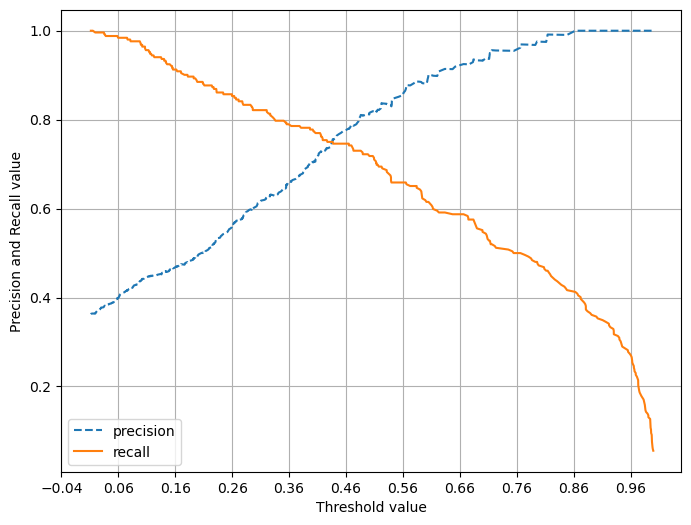

In [147]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, g_rfc.predict_proba(X_test)[:, 1].reshape(-1, 1))

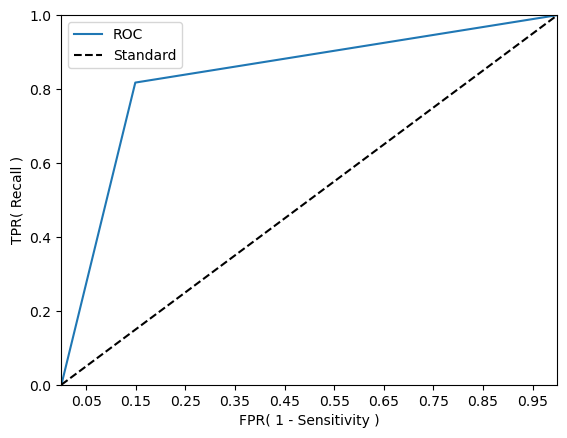

In [148]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)


In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_evaluation(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


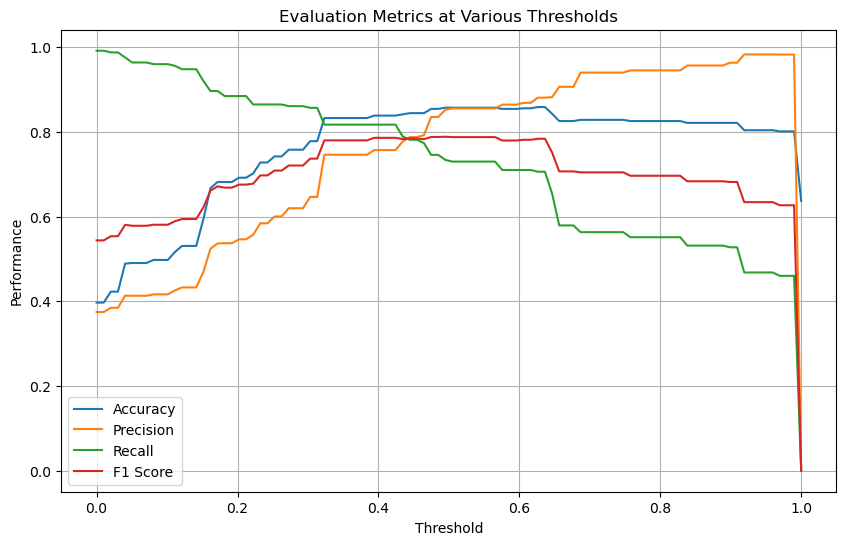

In [150]:
thresholds = np.linspace(0, 1, 100)
evaluations = []

for thresh in thresholds:
    binarizer = Binarizer(threshold=thresh)
    custom_prediction = binarizer.fit_transform(proba[:, 1].reshape(-1, 1))
    evaluations.append(get_evaluation(y_test, custom_prediction))

evaluations = np.array(evaluations)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, evaluations[:, 0], label='Accuracy')
plt.plot(thresholds, evaluations[:, 1], label='Precision')
plt.plot(thresholds, evaluations[:, 2], label='Recall')
plt.plot(thresholds, evaluations[:, 3], label='F1 Score')
plt.title('Evaluation Metrics at Various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Performance')
plt.legend(loc='best')
plt.grid(True)
plt.show()